In [297]:
import pandas as pd
import glob
import matplotlib.pyplot as plt 
import seaborn as sns
from ast import literal_eval

In [298]:
data_EU = pd.read_csv("EU Full Data.csv")
data_EU

,EU_ID,AGE_GROUP,SEX,SYMPTOMS_LIST,VAX_MANU
0,EU-EC-10011128636,18-64,M,"['Dysaesthesia', 'Muscle contractions involunt...",ASTRAZENECA
1,EU-EC-10011128637,65-85,F,"['Abdominal pain upper', 'Blood pressure incre...",ASTRAZENECA
2,EU-EC-10011128695,18-64,M,['Tinnitus'],ASTRAZENECA
3,EU-EC-10011128705,65-85,F,['Urticaria'],ASTRAZENECA
4,EU-EC-10011128724,65-85,M,['Cardiac failure'],ASTRAZENECA
...,...,...,...,...,...
1498250,EU-EC-10015031220,18-64,F,"['Asthenia', 'Musculoskeletal stiffness', 'Mya...",VIDPREVTYN
1498251,EU-EC-10014987895,18-64,M,"['Eye pruritus', 'Ocular discomfort']",VIDPREVTYN
1498252,EU-EC-10014940221,65-85,U,"['Feeling cold', 'Influenza like illness', 'Pa...",VIDPREVTYN
1498253,EU-EC-10014652497,18-64,M,"['Gastrointestinal disorder', 'Immunisation re...",VIDPREVTYN


In [299]:
print(data_EU['VAX_MANU'].value_counts())

VAX_MANU
PFIZER         602912
ASTRAZENECA    427820
MODERNA        393824
JANSSEN         71565
NOVAVAX          1684
VIDPREVTYN        416
VALNEVA            34
Name: count, dtype: int64


In [300]:
data_EU["SYMPTOMS_LIST"] = data_EU["SYMPTOMS_LIST"].apply(literal_eval)

all_symptoms = data_EU.explode(["SYMPTOMS_LIST"])
all_symptoms.head()

,EU_ID,AGE_GROUP,SEX,SYMPTOMS_LIST,VAX_MANU
0,EU-EC-10011128636,18-64,M,Dysaesthesia,ASTRAZENECA
0,EU-EC-10011128636,18-64,M,Muscle contractions involuntary,ASTRAZENECA
0,EU-EC-10011128636,18-64,M,Paraesthesia,ASTRAZENECA
0,EU-EC-10011128636,18-64,M,Rash erythematous,ASTRAZENECA
1,EU-EC-10011128637,65-85,F,Abdominal pain upper,ASTRAZENECA


In [414]:
symptom_counts = all_symptoms["SYMPTOMS_LIST"].value_counts().head(100)
symptom_counts
# 90 values in 5 digits and above.
# 394 values in 4 digits and above.

SYMPTOMS_LIST
Headache                    367402
Pyrexia                     317638
Fatigue                     275947
Myalgia                     215768
Chills                      206109
                             ...  
Contusion                     9518
Blood pressure increased      9495
Deep vein thrombosis          9195
Condition aggravated          8973
Nasopharyngitis               8877
Name: count, Length: 100, dtype: int64

In [415]:
death_counts = all_symptoms[all_symptoms["SYMPTOMS_LIST"] == "Death"]["SYMPTOMS_LIST"].value_counts()

# Print the value count of "Death"
print(death_counts)

SYMPTOMS_LIST
Death    4928
Name: count, dtype: int64


In [302]:
with open('eu symptoms.txt', 'w') as f:
    for i in symptom_counts.index:
        f.write(i + '\n')

In [303]:
symptoms_list = [
    "Headache", "Pyrexia", "Fatigue", "Myalgia", "Chills", "Nausea", "Malaise", "Arthralgia", "COVID-19",
    "Dizziness", "Pain in extremity", "Injection site pain", "Vaccination site pain", "Pain", "Dyspnoea",
    "Lymphadenopathy", "Asthenia", "Vomiting", "Paraesthesia", "Influenza like illness", "Rash", "Diarrhoea",
    "Chest pain", "Heavy menstrual bleeding", "Limb discomfort", "Palpitations", "Hypoaesthesia", "Pruritus",
    "Injection site swelling", "Influenza", "Injection site erythema", "Menstrual disorder", "Hyperhidrosis",
    "Syncope", "Cough", "Tachycardia", "Back pain", "Vaccination site erythema", "Vaccination site swelling",
    "Injection site inflammation", "Abdominal pain", "Body temperature increased", "Menstruation irregular",
    "Chest discomfort", "Urticaria", "Injection site warmth", "Erythema", "Tinnitus", "Feeling hot", "Dysmenorrhoea",
    "Decreased appetite", "Peripheral swelling", "Somnolence", "Tremor", "Migraine", "Intermenstrual bleeding",
    "Insomnia", "Herpes zoster", "Menstruation delayed", "Oropharyngeal pain", "Amenorrhoea", "Vaccination site reaction",
    "Muscle spasms", "Muscular weakness", "Polymenorrhoea", "Neck pain", "Vertigo", "Abdominal pain upper",
    "Heart rate increased", "Pulmonary embolism", "Hypertension", "Feeling cold", "Vaccination site pruritus",
    "Swelling", "Arrhythmia", "Injection site reaction", "Myocarditis", "Loss of consciousness", "Vision blurred",
    "Disturbance in attention", "Visual impairment", "Axillary pain"
]

In [304]:
print(len(symptoms_list))

82


In [305]:
eu_data_filtered2 = all_symptoms[all_symptoms["SYMPTOMS_LIST"].isin(symptoms_list)]
eu_data_filtered2.head()

,EU_ID,AGE_GROUP,SEX,SYMPTOMS_LIST,VAX_MANU
0,EU-EC-10011128636,18-64,M,Paraesthesia,ASTRAZENECA
1,EU-EC-10011128637,65-85,F,Abdominal pain upper,ASTRAZENECA
1,EU-EC-10011128637,65-85,F,Headache,ASTRAZENECA
1,EU-EC-10011128637,65-85,F,Vertigo,ASTRAZENECA
2,EU-EC-10011128695,18-64,M,Tinnitus,ASTRAZENECA


In [306]:
all_symptoms_filtered = all_symptoms["SYMPTOMS_LIST"][all_symptoms["SYMPTOMS_LIST"].isin(symptoms_list)]
all_symptoms_filtered

0                    Paraesthesia
1            Abdominal pain upper
1                        Headache
1                         Vertigo
2                        Tinnitus
                    ...          
1498250     Vaccination site pain
1498252              Feeling cold
1498252    Influenza like illness
1498252         Pain in extremity
1498252                    Tremor
Name: SYMPTOMS_LIST, Length: 3945273, dtype: object

In [307]:
all_symptoms_filtered.head()

0            Paraesthesia
1    Abdominal pain upper
1                Headache
1                 Vertigo
2                Tinnitus
Name: SYMPTOMS_LIST, dtype: object

In [308]:
soc_symptoms_dict = {
    "SOC 01 - Blood and lymphatic system disorders": [],
    "SOC 02 - Cardiac disorders": ["Chest pain", "Chest discomfort", "Palpitations", "Tachycardia", "Myocarditis","Arrhythmia"],
    "SOC 03 - Congenital, familial and genetic disorders": [],
    "SOC 04 - Ear and labyrinth disorders": ["Tinnitus","Vertigo"],
    "SOC 05 - Endocrine disorders": [],
    "SOC 06 - Eye disorders": ["Vision blurred", "Visual impairment"],
    "SOC 07 - Gastrointestinal disorders": ["Nausea", "Vomiting", "Diarrhoea", "Abdominal pain", "Abdominal pain upper"],
    "SOC 08 - General disorders and administration site conditions": [
        "Pyrexia", "Fatigue", "Pain", "Chills", "Pain in extremity", "Injection site pain", "Asthenia", "Injection site erythema", 
        "Malaise", "Injection site swelling", "Peripheral swelling", "Injection site pruritus", "Vaccination site pain", 
        "Injection site warmth", "Swelling", "Death", "Feeling hot", "Influenza like illness", "Injection site rash", 
        "Body temperature increased", "Vaccination site erythema", "Vaccination site swelling", "Vaccination site reaction","Axillary pain"
    ],
    "SOC 09 - Hepatobiliary disorders": [],
    "SOC 10 - Immune system disorders": [],
    "SOC 11 - Infections and infestations": ["COVID-19", "Herpes zoster", "Influenza"],
    "SOC 12 - Injury, poisoning and procedural complications": [],
    "SOC 13 - Investigations": ["Lymphadenopathy", "Heart rate increased"],
    "SOC 14 - Metabolism and nutrition disorders": ["Decreased appetite"],
    "SOC 15 - Musculoskeletal and connective tissue disorders": [
        "Myalgia", "Arthralgia", "Back pain", "Mobility decreased", "Neck pain", "Muscle spasms", "Muscular weakness"
    ],
    "SOC 16 - Neoplasms benign, malignant and unspecified": [],
    "SOC 17 - Nervous system disorders": [
        "Headache", "Dizziness", "Paraesthesia", "Hypoaesthesia", "Syncope", "Tremor", "Loss of consciousness", "Migraine", 
        "Gait disturbance", "Disturbance in attention", "Somnolence", "Paraesthesia", "Hypoaesthesia"
    ],
    "SOC 18 - Psychiatric disorders": ["Feeling abnormal", "Insomnia", "Sleep disorder"],
    "SOC 19 - Renal and urinary disorders": [],
    "SOC 20 - Reproductive system and breast disorders": [
        "Dysmenorrhoea", "Polymenorrhoea", "Amenorrhoea", "Menstruation irregular", "Menstruation delayed", 
        "Heavy menstrual bleeding", "Intermenstrual bleeding", "Menstrual disorder"
    ],
    "SOC 21 - Respiratory, thoracic and mediastinal disorders": ["Dyspnoea", "Cough", "Oropharyngeal pain", "Rhinorrhoea"],
    "SOC 22 - Skin and subcutaneous tissue disorders": [
        "Rash", "Pruritus", "Erythema", "Urticaria", "Rash erythematous", "Rash pruritic", "Vaccination site pruritus", 
        "Injection site reaction", "Injection site rash","Hyperhidrosis"],
    
    "SOC 23 - Social circumstances": [],
    "SOC 24 - Surgical and medical procedures": [],
    "SOC 25 - Vascular disorders": ["Pulmonary embolism", "Hypertension"],
    "SOC 26 - Product issues": []}

In [309]:
symptoms_soc_dict = {symptom: soc for soc, symptoms in soc_symptoms_dict.items() for symptom in symptoms}
eu_data_filtered2["SOC"] = eu_data_filtered2["SYMPTOMS_LIST"].map(symptoms_soc_dict)
eu_data_filtered2.sample(40)

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_9485/2700768761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data_filtered2["SOC"] = eu_data_filtered2["SYMPTOMS_LIST"].map(symptoms_soc_dict)


,EU_ID,AGE_GROUP,SEX,SYMPTOMS_LIST,VAX_MANU,SOC
685514,EU-EC-10014075399,18-64,F,Peripheral swelling,MODERNA,SOC 08 - General disorders and administration ...
573576,EU-EC-10009985261,18-64,F,COVID-19,MODERNA,SOC 11 - Infections and infestations
157490,EU-EC-10008862944,18-64,F,Myalgia,ASTRAZENECA,SOC 15 - Musculoskeletal and connective tissue...
37898,EU-EC-10010367838,18-64,F,Injection site pain,ASTRAZENECA,SOC 08 - General disorders and administration ...
609769,EU-EC-10009381024,18-64,F,Injection site warmth,MODERNA,SOC 08 - General disorders and administration ...
270922,EU-EC-10013948603,18-64,F,Myalgia,ASTRAZENECA,SOC 15 - Musculoskeletal and connective tissue...
897732,EU-EC-10011122232,18-64,M,Hyperhidrosis,PFIZER,SOC 22 - Skin and subcutaneous tissue disorders
294855,EU-EC-10013644520,18-64,F,Pain in extremity,ASTRAZENECA,SOC 08 - General disorders and administration ...
563575,EU-EC-10010132692,18-64,F,Amenorrhoea,MODERNA,SOC 20 - Reproductive system and breast disorders
1001583,EU-EC-10010625220,Not Specified,F,Vaccination site erythema,PFIZER,SOC 08 - General disorders and administration ...


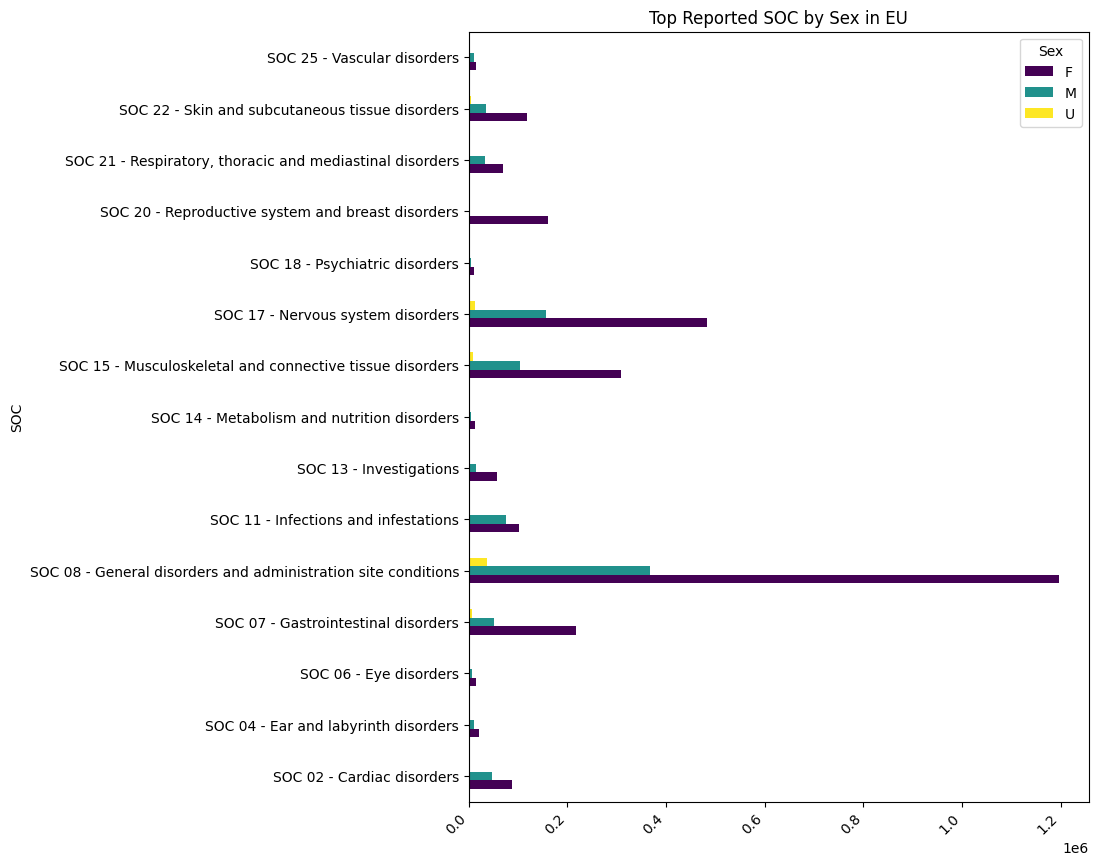

In [406]:
soc_counts_by_sex = eu_data_filtered2.groupby(["SOC", "SEX"]).size().unstack(fill_value=0)
soc_counts_by_sex.plot(kind='barh', stacked=False, figsize=(8, 10), colormap='viridis')
plt.title('Top Reported SOC by Sex in EU')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')

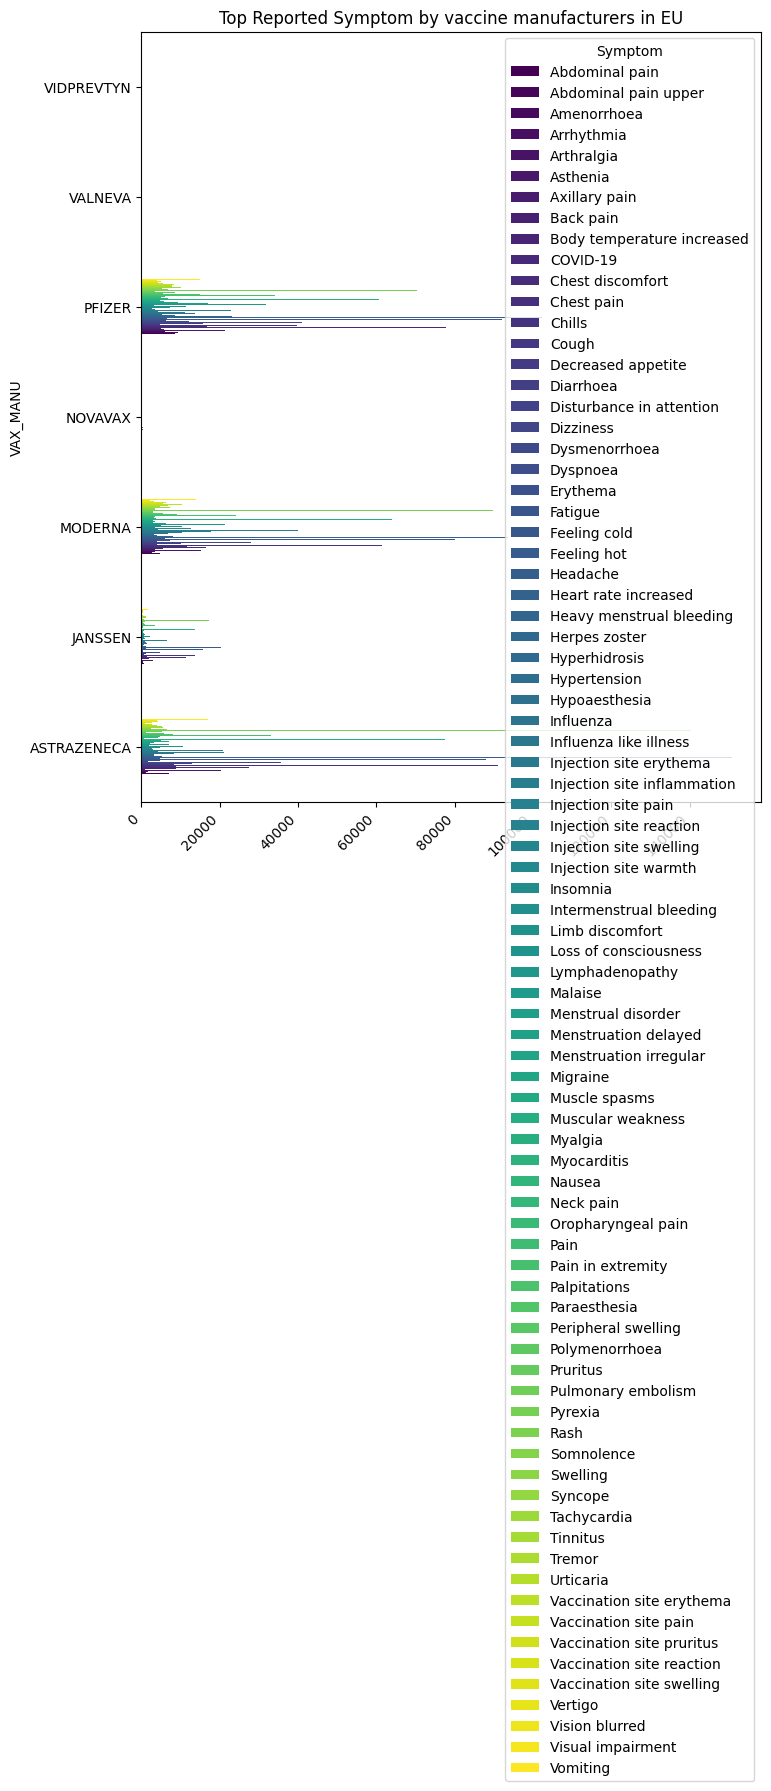

In [411]:
sym_counts_by_vax = eu_data_filtered2.groupby(["VAX_MANU","SYMPTOMS_LIST"]).size().unstack(fill_value=0)
sym_counts_by_vax.plot(kind='barh', stacked=False, figsize=(8, 10), colormap='viridis')
plt.title('Top Reported Symptom by vaccine manufacturers in EU')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Symptom')

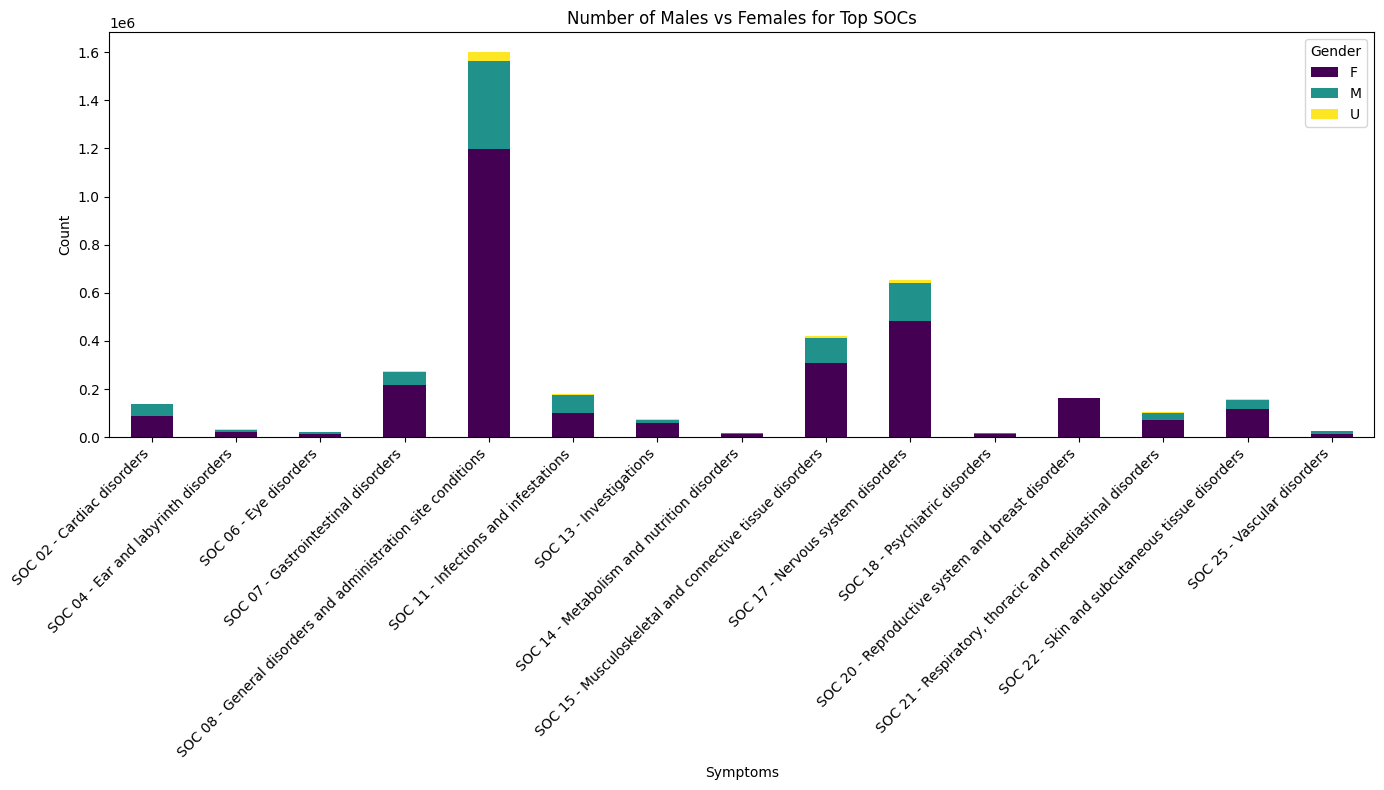

In [311]:
soc_counts_by_sex.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.title('Number of Males vs Females for Top SOCs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

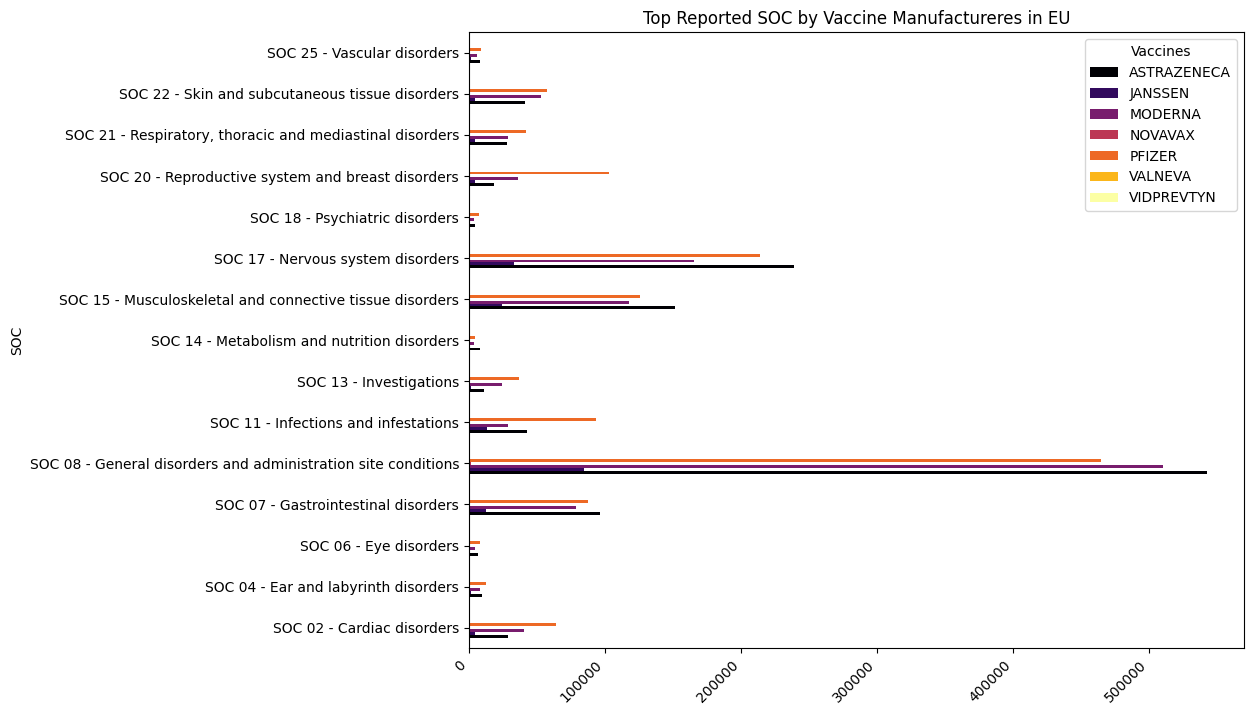

In [360]:
soc_counts_by_vaccine = eu_data_filtered2.groupby(["SOC", "VAX_MANU"]).size().unstack(fill_value=0)
soc_counts_by_vaccine.plot(kind='barh', stacked=False, figsize=(10, 8), colormap='inferno')
plt.title('Top Reported SOC by Vaccine Manufactureres in EU')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vaccines')

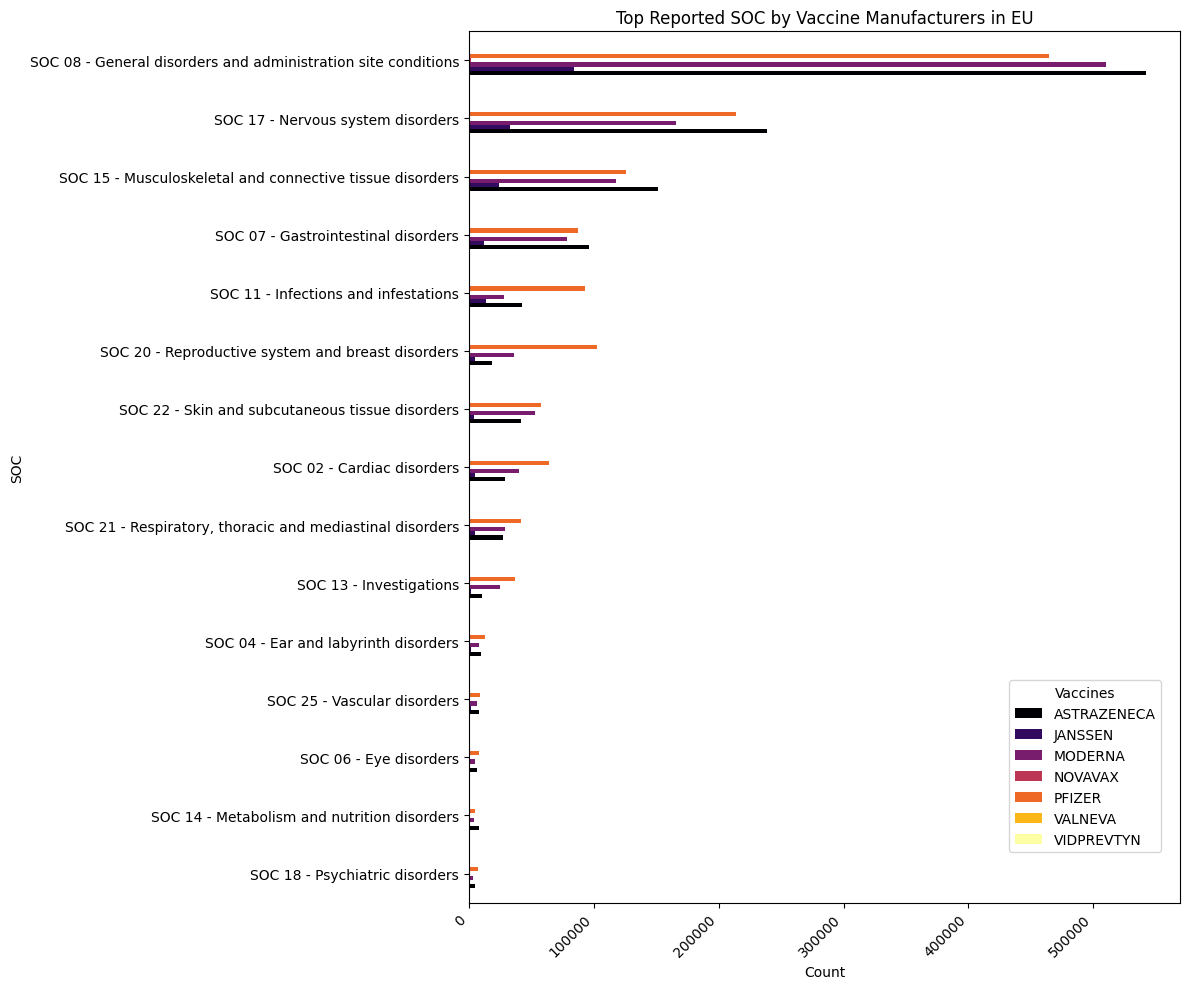

In [387]:
soc_counts_by_vaccine = eu_data_filtered2.groupby(["SOC", "VAX_MANU"]).size().unstack(fill_value=0)

# Calculate the total count for each SOC
soc_counts_by_vaccine['Total'] = soc_counts_by_vaccine.sum(axis=1)

# Sort the DataFrame by the 'Total' column
soc_counts_by_vaccine = soc_counts_by_vaccine.sort_values(by='Total')

# Drop the 'Total' column as it is no longer needed for the plot
soc_counts_by_vaccine = soc_counts_by_vaccine.drop(columns='Total')

# Plot the sorted DataFrame
ax = soc_counts_by_vaccine.plot(kind='barh', stacked=False, figsize=(12, 10), colormap='inferno')

# Add title and labels
plt.title('Top Reported SOC by Vaccine Manufacturers in EU')
plt.xlabel('Count')
plt.ylabel('SOC')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vaccines', bbox_to_anchor=(0.75, 0.05), loc='lower left')

# Display the plot
plt.tight_layout()
plt.show()

In [313]:
#soc_counts_by_vaccine.head()
soc_counts_by_vaxeu= soc_counts_by_vaccine.drop(columns=['VIDPREVTYN'])
#soc_counts_by_vaxeu = soc_counts_by_vaxeu.apply(pd.to_numeric, errors='coerce')
soc_counts_by_vaxeu.head(50)
#soc_counts_by_vaxeu['MODERNA'].head(15)

VAX_MANU,ASTRAZENECA,JANSSEN,MODERNA,NOVAVAX,PFIZER,VALNEVA
SOC,,,,,,
SOC 02 - Cardiac disorders,28600,4922,40486,342,64064,1
SOC 04 - Ear and labyrinth disorders,9477,1621,8038,54,12884,0
SOC 06 - Eye disorders,6868,1053,4582,41,8517,0
SOC 07 - Gastrointestinal disorders,96064,12346,78456,272,87645,0
SOC 08 - General disorders and administration site conditions,542248,84443,509847,1760,464194,10
SOC 11 - Infections and infestations,42425,13533,28461,185,93405,2
SOC 13 - Investigations,10968,1519,24604,106,36788,0
SOC 14 - Metabolism and nutrition disorders,8473,665,4107,18,4814,0
SOC 15 - Musculoskeletal and connective tissue disorders,151218,24152,117963,438,126087,1


In [314]:
#covid_vax = pd.read_csv('/Users/adi/Desktop/MS1/USDATA/covid_vax_manu.csv')
#covid_vax_EU = covid_vax[covid_vax['Entity'] == 'European Union']

#new_names = {'Pfizer/BioNTech': 'PFIZER', 'Moderna': 'MODERNA','Johnson&Johnson': 'JANSSEN', 'Novavax': 'NOVAVAX','Oxford/AstraZeneca': 'ASTRAZENECA', 'Valneva': 'VALNEVA' }
#covid_EU_renamed = covid_vax_EU.rename(columns=new_names)

#covid_EU_renamed['Day'] = pd.to_datetime(covid_EU_renamed['Day'], format='%m/%d/%y')
#start_date = '2021-01-01'
#end_date = '2023-12-31'
#filtered_df_EU = covid_EU_renamed[(covid_EU_renamed['Day'] >= start_date) & (covid_EU_renamed['Day'] <= end_date)]
#manufacturers = ['JANSSEN', 'MODERNA', 'NOVAVAX', 'PFIZER', 'ASTRAZENECA','VALNEVA']
##total_doses_last_day_EU = filtered_df_EU.iloc[-1]
#total_doses_filtered = total_doses_last_day_EU[manufacturers]
#total_doses_df1 = pd.DataFrame(total_doses_filtered).T
#normalized_pivot_table5 = soc_counts_by_vaxeu.div(total_doses_df1.values, axis=1)

##############################
# Total doses for each manufacturer
total_doses = {
    'JANSSEN': 18699990,
    'MODERNA': 156358519,
    'NOVAVAX': 310008,
    'PFIZER': 664617234,
    'ASTRAZENECA': 67183317,
    'VALNEVA': 10193
}

# Convert total doses to a DataFrame for easy manipulation
total_doses_df = pd.DataFrame(total_doses, index=['Total Doses']).T

# Calculate normalized frequencies
normalized_pivot_table5 = soc_counts_by_vaxeu / total_doses_df['Total Doses'].values

# Ensure all values are numeric and handle NaNs
normalized_pivot_table5 = normalized_pivot_table5.apply(pd.to_numeric, errors='coerce').fillna(0)

# Display the first few rows of the normalized pivot table
print(normalized_pivot_table5.head(16))

VAX_MANU                                            ASTRAZENECA   JANSSEN  \
SOC                                                                         
SOC 02 - Cardiac disorders                             0.001529  0.000031   
SOC 04 - Ear and labyrinth disorders                   0.000507  0.000010   
SOC 06 - Eye disorders                                 0.000367  0.000007   
SOC 07 - Gastrointestinal disorders                    0.005137  0.000079   
SOC 08 - General disorders and administration s...     0.028997  0.000540   
SOC 11 - Infections and infestations                   0.002269  0.000087   
SOC 13 - Investigations                                0.000587  0.000010   
SOC 14 - Metabolism and nutrition disorders            0.000453  0.000004   
SOC 15 - Musculoskeletal and connective tissue ...     0.008087  0.000154   
SOC 17 - Nervous system disorders                      0.012773  0.000211   
SOC 18 - Psychiatric disorders                         0.000253  0.000004   

                                                    ASTRAZENECA   JANSSEN  \
Cardiac disorders                                      0.000426  0.000263   
Ear and labyrinth disorders                            0.000078  0.000062   
Eye disorders                                          0.000102  0.000056   
Gastrointestinal disorders                             0.001430  0.000660   
General disorders and administration site condi...     0.008071  0.004516   
Infections and infestations                            0.000631  0.000724   
Investigations                                         0.000163  0.000081   
Metabolism and nutrition disorders                     0.000126  0.000036   
Musculoskeletal and connective tissue disorders        0.002251  0.001292   
Nervous system disorders                               0.003555  0.001766   
Psychiatric disorders                                  0.000070  0.000036   
Reproductive system and breast disorders               0.000241  0.000216   

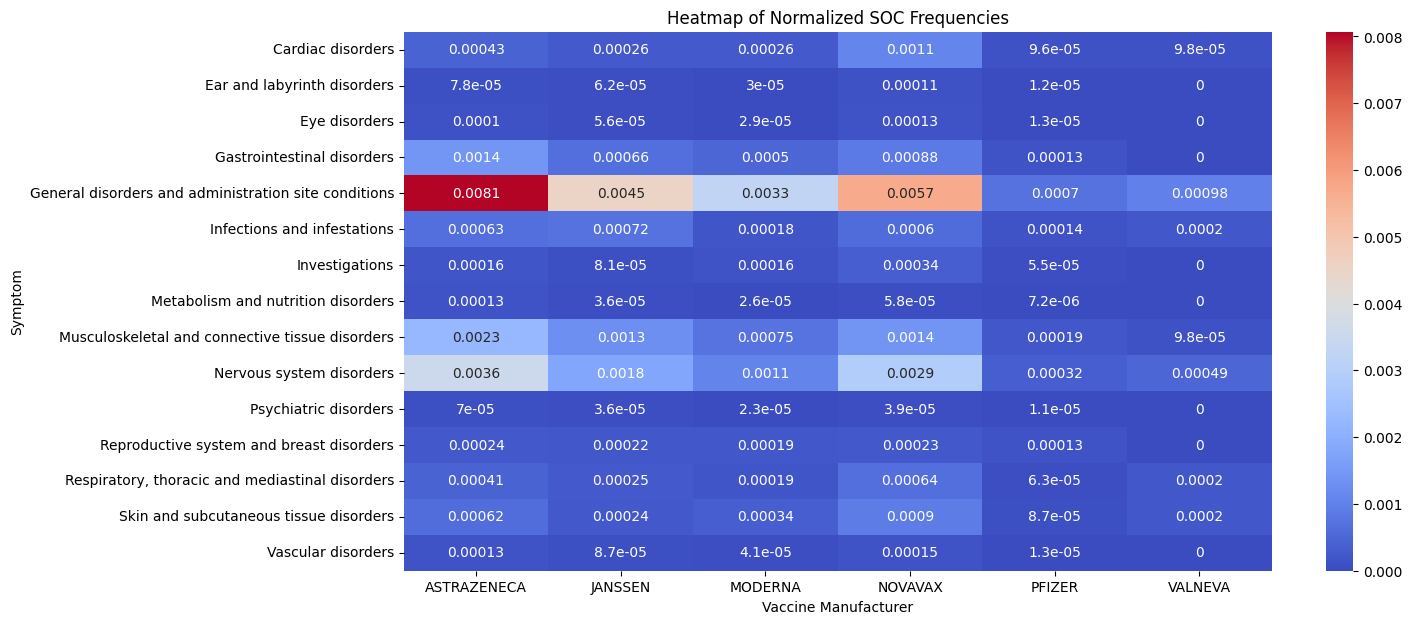

In [315]:
## This heatmap is correct, not the one above
#data = {
   # 'ASTRAZENECA': [37166, 9477, 6868, 96064, 553916, 42425, 10968, 8473, 151218, 236363, 7228, 18554, 27718, 26730],
   # 'JANSSEN': [6545, 1621, 1053, 12346, 86561, 13533, 1519, 665, 24152, 32570, 1126, 4808, 4718, 2786],
   # 'MODERNA': [46876, 8038, 4582, 78456, 526710, 28461, 24604, 4107, 117963, 163339, 5843, 36193, 29022, 37336],
    #'NOVAVAX': [389, 54, 41, 272, 1788, 185, 106, 18, 438, 874, 40, 88, 197, 230],
    #'PFIZER': [72884, 12884, 8517, 87645, 468607, 93405, 36788, 4814, 126087, 208650, 12515, 102681, 41813, 41386],
    #'VALNEVA': [1, 0, 0, 0, 10, 2, 0, 0, 1, 5, 0, 0, 2, 1]
#}
data = {
    'ASTRAZENECA': [28600, 5258, 6868, 96064, 542248, 42425, 10968, 8473, 151218, 238856, 4735, 16202, 27718, 41589, 8566],
    'JANSSEN': [4922, 1153, 1053, 12346, 84443, 13533, 1519, 665, 24152, 33028, 668, 4042, 4718, 4562, 1623],
    'MODERNA': [40486, 4724, 4582, 78456, 509847, 28461, 24604, 4107, 117963, 165646, 3536, 29867, 29022, 53163, 6390],
    'NOVAVAX': [342, 35, 41, 272, 1760, 185, 106, 18, 438, 902, 12, 72, 197, 278, 47],
    'PFIZER': [64064, 7810, 8517, 87645, 464194, 93405, 36788, 4814, 126087, 213757, 7408, 85720, 41813, 57495, 8820],
    'VALNEVA': [1, 0, 0, 0, 10, 2, 0, 0, 1, 5, 0, 0, 2, 2, 0]
}

# Convert to DataFrame
soc_counts_df = pd.DataFrame(data, index=[
    'Cardiac disorders', 'Ear and labyrinth disorders', 'Eye disorders',
    'Gastrointestinal disorders', 'General disorders and administration site conditions',
    'Infections and infestations', 'Investigations', 'Metabolism and nutrition disorders',
    'Musculoskeletal and connective tissue disorders', 'Nervous system disorders',
    'Psychiatric disorders', 'Reproductive system and breast disorders',
    'Respiratory, thoracic and mediastinal disorders', 'Skin and subcutaneous tissue disorders','Vascular disorders'
])



total_doses = {
    'JANSSEN': 18699990,
    'MODERNA': 156358519,
    'NOVAVAX': 310008,
    'PFIZER': 664617234,
    'ASTRAZENECA': 67183317,
    'VALNEVA': 10193
}


total_doses_df = pd.DataFrame(total_doses, index=['Total Doses'])


soc_counts_df = soc_counts_df.apply(pd.to_numeric, errors='coerce')
total_doses_df = total_doses_df.apply(pd.to_numeric, errors='coerce')

normalized_pivot_table6 = soc_counts_df.div(total_doses_df.T['Total Doses'], axis=1)
print(normalized_pivot_table6)

plt.figure(figsize=(14, 7))
sns.heatmap(normalized_pivot_table6.head(15), annot=True, cmap='coolwarm')
plt.title('Heatmap of Normalized SOC Frequencies')
plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Symptom')
plt.show()


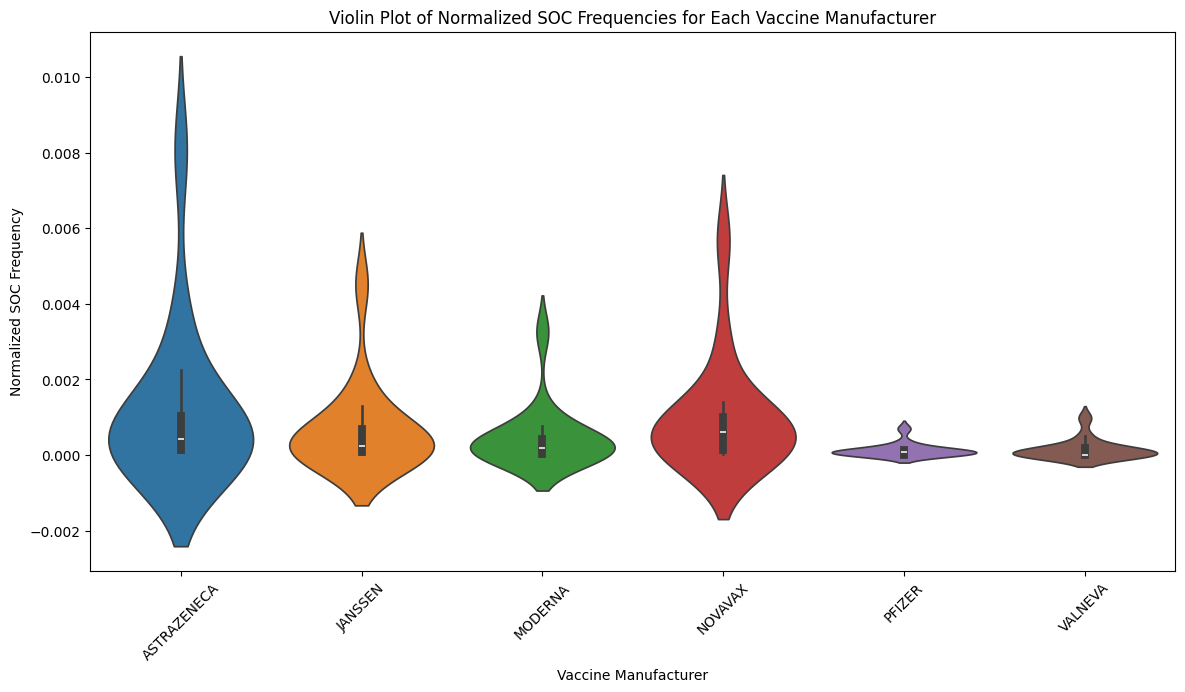

In [317]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=normalized_pivot_table6)
plt.title('Violin Plot of Normalized SOC Frequencies for Each Vaccine Manufacturer')
plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Normalized SOC Frequency')
plt.xticks(rotation=45)
plt.show()

In [318]:
# Using data of normalized SOC frequency by vaccine manufacturers

from scipy.stats import ttest_ind
manufacturers = normalized_pivot_table6.columns
ttest_results = {}
for i in range(len(manufacturers)):
    for j in range(i + 1, len(manufacturers)):
        manu1 = manufacturers[i]
        manu2 = manufacturers[j]
        values1 = normalized_pivot_table6[manu1]
        values2 = normalized_pivot_table6[manu2]
        # Check for NaN values
        #if not values1.isnull().values.any() and not values2.isnull().values.any() and len(values1) > 1 and len(values2) > 1:
        t_statistic, p_value = ttest_ind(values1, values2)
        ttest_results[f'{manu1} vs {manu2}'] = (t_statistic, p_value)  
            # Interpretation of results
        if p_value < 0.05:   
            print(f"There is a significant difference between {manu1} and {manu2}.")
        else:   
            print(f"There is no significant difference between {manu1} and {manu2}.")

# Display all t-test results
print("\nT-Test Results for Each Pair of Manufacturers:")
for pair, result in ttest_results.items():
    print(f"{pair}: T-Statistic: {result[0]}, P-Value: {result[1]}")

There is no significant difference between ASTRAZENECA and JANSSEN.
There is no significant difference between ASTRAZENECA and MODERNA.
There is no significant difference between ASTRAZENECA and NOVAVAX.
There is no significant difference between ASTRAZENECA and PFIZER.
There is no significant difference between ASTRAZENECA and VALNEVA.
There is no significant difference between JANSSEN and MODERNA.
There is no significant difference between JANSSEN and NOVAVAX.
There is no significant difference between JANSSEN and PFIZER.
There is no significant difference between JANSSEN and VALNEVA.
There is no significant difference between MODERNA and NOVAVAX.
There is no significant difference between MODERNA and PFIZER.
There is no significant difference between MODERNA and VALNEVA.
There is a significant difference between NOVAVAX and PFIZER.
There is a significant difference between NOVAVAX and VALNEVA.
There is no significant difference between PFIZER and VALNEVA.

T-Test Results for Each Pa

                             SOC      AGE_GROUP   COUNT
0     SOC 02 - Cardiac disorders      0-1 Month      32
1     SOC 02 - Cardiac disorders          12-17    3865
2     SOC 02 - Cardiac disorders          18-64  111235
3     SOC 02 - Cardiac disorders   2 Months - 2      13
4     SOC 02 - Cardiac disorders           3-11     227
..                           ...            ...     ...
114  SOC 25 - Vascular disorders   2 Months - 2       3
115  SOC 25 - Vascular disorders           3-11       3
116  SOC 25 - Vascular disorders          65-85    7544
117  SOC 25 - Vascular disorders   More than 85     840
118  SOC 25 - Vascular disorders  Not Specified    1417

[119 rows x 3 columns]


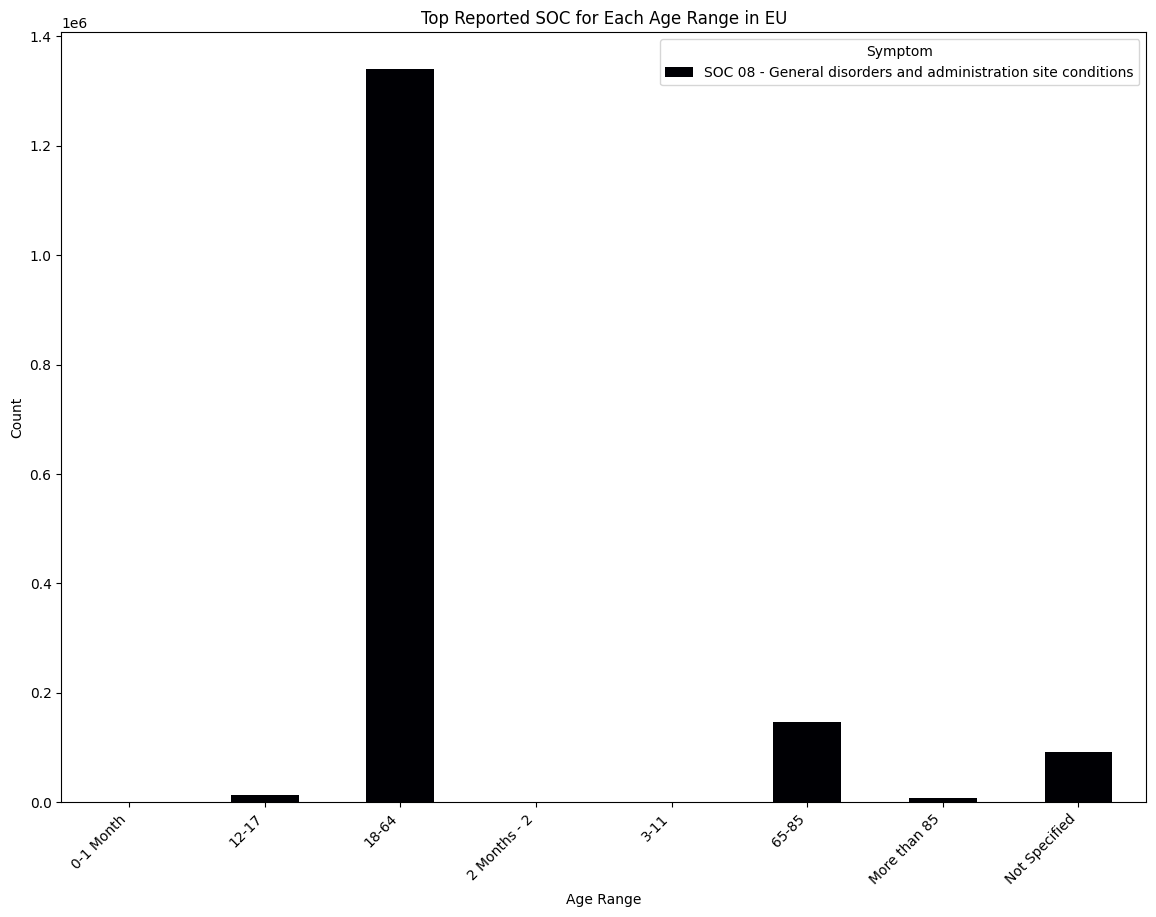

In [319]:
soc_counts_by_age_range = eu_data_filtered2.groupby(["SOC", "AGE_GROUP"]).size().reset_index(name = "COUNT")
print(soc_counts_by_age_range)
top_soc_per_age_range = soc_counts_by_age_range.loc[soc_counts_by_age_range.groupby("AGE_GROUP")["COUNT"].idxmax()]
top_soc_per_age_range.pivot(index = "AGE_GROUP", columns = "SOC", values = "COUNT").plot(kind = "bar", stacked = True, figsize = (14, 10), colormap = "inferno")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.title("Top Reported SOC for Each Age Range in EU")
plt.xticks(rotation = 45, ha = "right")
plt.legend(title = "Symptom")

In [320]:
soc_symptom_pairs = []

for symptom in all_symptoms_filtered:
    found = False
    for soc, symptoms in soc_symptoms_dict.items():
        if symptom in symptoms:
            soc_symptom_pairs.append((soc, symptom))
            found = True
            break

soc_symptom_df = pd.DataFrame(soc_symptom_pairs, columns=["SOC", "Symptom"])

In [321]:
soc_symptom_df.head()

,SOC,Symptom
0,SOC 17 - Nervous system disorders,Paraesthesia
1,SOC 07 - Gastrointestinal disorders,Abdominal pain upper
2,SOC 17 - Nervous system disorders,Headache
3,SOC 04 - Ear and labyrinth disorders,Vertigo
4,SOC 04 - Ear and labyrinth disorders,Tinnitus


In [322]:
soc_symptom_df['SOC'].value_counts()

SOC
SOC 08 - General disorders and administration site conditions    1602761
SOC 17 - Nervous system disorders                                 652300
SOC 15 - Musculoskeletal and connective tissue disorders          419954
SOC 07 - Gastrointestinal disorders                               274874
SOC 11 - Infections and infestations                              178034
SOC 20 - Reproductive system and breast disorders                 162328
SOC 22 - Skin and subcutaneous tissue disorders                   157142
SOC 02 - Cardiac disorders                                        138448
SOC 21 - Respiratory, thoracic and mediastinal disorders          103526
SOC 13 - Investigations                                            73994
SOC 04 - Ear and labyrinth disorders                               32080
SOC 25 - Vascular disorders                                        25459
SOC 06 - Eye disorders                                             21066
SOC 14 - Metabolism and nutrition disorders    

In [323]:
soc_symptom_df.to_csv("/Users/adi/Desktop/MS1/EUDATA/EU SOC and Symptoms.csv")

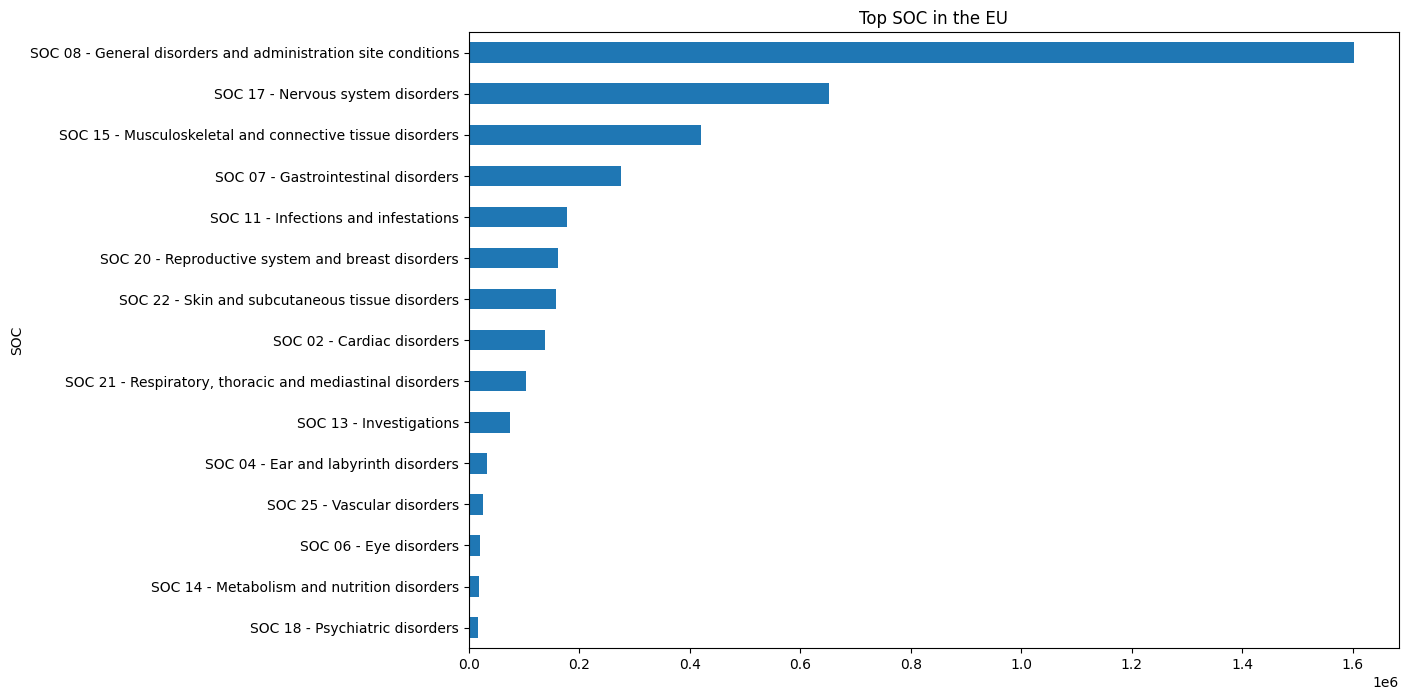

In [324]:
axes = soc_symptom_df["SOC"].value_counts().sort_values(ascending=True).plot(kind = "barh", figsize=(12, 8))
axes.title.set_text("Top SOC in the EU")

In [325]:
eu_data_filtered2.head(10)

,EU_ID,AGE_GROUP,SEX,SYMPTOMS_LIST,VAX_MANU,SOC
0,EU-EC-10011128636,18-64,M,Paraesthesia,ASTRAZENECA,SOC 17 - Nervous system disorders
1,EU-EC-10011128637,65-85,F,Abdominal pain upper,ASTRAZENECA,SOC 07 - Gastrointestinal disorders
1,EU-EC-10011128637,65-85,F,Headache,ASTRAZENECA,SOC 17 - Nervous system disorders
1,EU-EC-10011128637,65-85,F,Vertigo,ASTRAZENECA,SOC 04 - Ear and labyrinth disorders
2,EU-EC-10011128695,18-64,M,Tinnitus,ASTRAZENECA,SOC 04 - Ear and labyrinth disorders
3,EU-EC-10011128705,65-85,F,Urticaria,ASTRAZENECA,SOC 22 - Skin and subcutaneous tissue disorders
5,EU-EC-10011128726,18-64,F,Fatigue,ASTRAZENECA,SOC 08 - General disorders and administration ...
5,EU-EC-10011128726,18-64,F,Myalgia,ASTRAZENECA,SOC 15 - Musculoskeletal and connective tissue...
5,EU-EC-10011128726,18-64,F,Pain in extremity,ASTRAZENECA,SOC 08 - General disorders and administration ...
7,EU-EC-10011128757,18-64,F,Pain,ASTRAZENECA,SOC 08 - General disorders and administration ...


In [326]:
eu_data_filtered2.to_csv("/Users/adi/Desktop/MS1/EUDATA/EU SOC Data New.csv")

In [358]:
#total_US_melted = data_US.melt(id_vars=['VAERS_ID', 'SEX', 'VAX_MANU'], value_vars=symptom_columns, var_name='Symptom_Column', value_name='Symptom')

#eu_data_filtered3 = total_US_melted.dropna(subset=['VAX_MANU', 'Symptom'])

symptom_counts_by_vax_manu1 = eu_data_filtered2.groupby(['SYMPTOMS_LIST', 'VAX_MANU']).size().unstack(fill_value=0)

symptom_counts_by_vax_manu1 = symptom_counts_by_vax_manu1.reset_index()

#top_symptoms = symptom_counts.head(20).index
symptom_counts_by_vax_manu1 = symptom_counts_by_vax_manu1[symptom_counts_by_vax_manu1['SYMPTOMS_LIST'].isin(symptoms_list)].head(20)

# Set the figure size
plt.figure(figsize=(14, 10))

# Create the bar plot
symptom_counts_by_vax_manu1.set_index('Symptom').plot(kind='bar', stacked=False, figsize=(14, 10), colormap='coolwarm')

# Set plot labels and title
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.title('Top 20 Reported Symptoms by Vaccine Manufacturer in USA')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.legend(title='Vaccine Manufacturer')
plt.tight_layout()
plt.show()

KeyError: "None of ['Symptom'] are in the columns"

<Figure size 1400x1000 with 0 Axes>

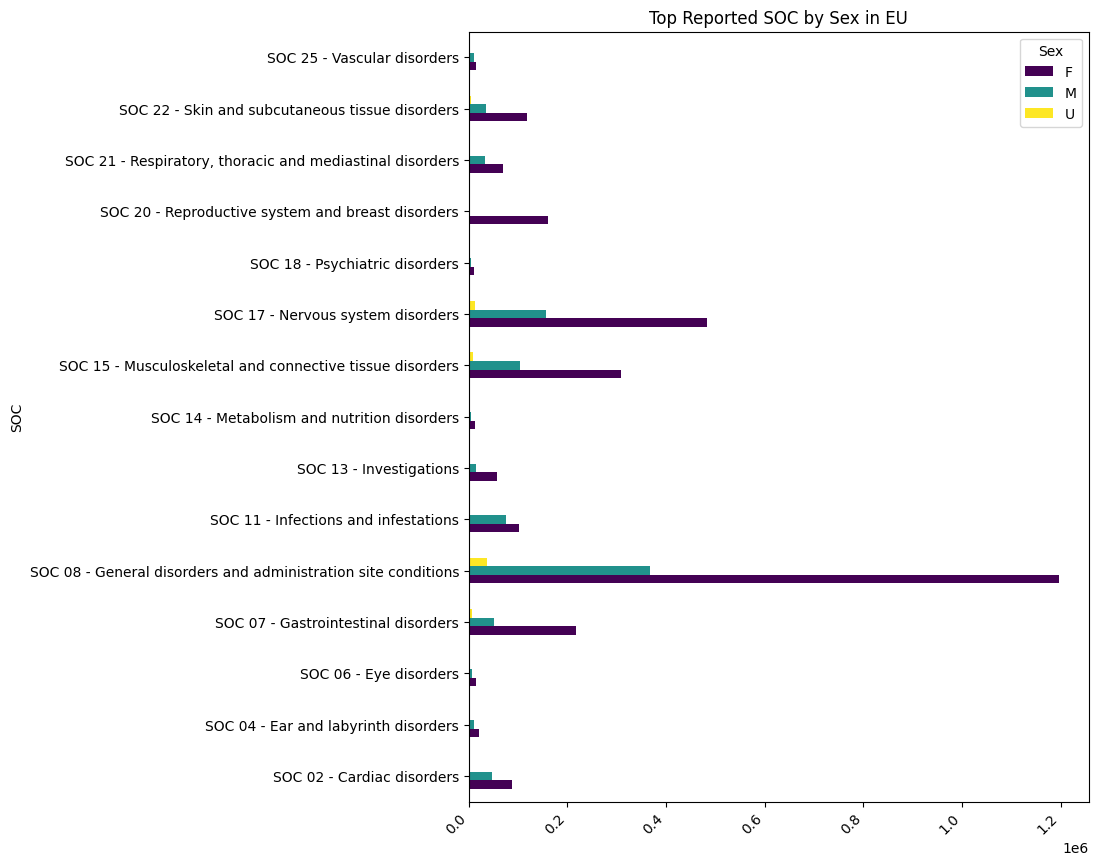

In [327]:
soc_counts_by_sex2= eu_data_filtered2.groupby(["SOC", "SEX"]).size().unstack(fill_value=0)
soc_counts_by_sex.plot(kind='barh', stacked=False, figsize=(8, 10), colormap='viridis')
plt.title('Top Reported SOC by Sex in EU')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')

In [328]:
from scipy.stats import chi2_contingency
contingency_table = soc_counts_by_sex2[['F', 'M']]

# Perform the chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{ex}")

# Interpretation
if p_val < 0.05:
    print("There is a significant difference in the number of different SOC by sex (F and M).")
else:
    print("There is no significant difference in the number of different SOC by sex (F and M).")

Chi-Square Statistic: 106501.56070190393
P-Value: 0.0
Degrees of Freedom: 14
Expected Frequencies: 
[[ 102921.37298642   32856.62701358]
 [  23866.7703888     7619.2296112 ]
 [  15649.91873998    4996.08126002]
 [ 204027.30688623   65133.69311377]
 [1186350.40547778  378730.59452222]
 [ 133476.84254027   42611.15745973]
 [  54345.68071603   17349.31928397]
 [  13420.60502235    4284.39497765]
 [ 311515.70304461   99448.29695538]
 [ 484309.87751961  154611.12248039]
 [  12173.67504428    3886.32495572]
 [ 122218.08815468   39016.91184532]
 [  76749.48766551   24501.51233449]
 [ 116056.96544235   37050.03455765]
 [  18997.30037109    6064.69962891]]
There is a significant difference in the number of different SOC by sex (F and M).


In [329]:
# T test between age groups by SOC counts
#pivot_table8 = eu_data_filtered2.pivot(index='SOC', columns='AGE_GROUP', values='COUNT').fillna(0)
pivot_table8 = eu_data_filtered2.groupby(["SOC", "AGE_GROUP"]).size().unstack(fill_value=0)

age_groups = pivot_table8.columns.tolist()

for i, group1 in enumerate(age_groups):
    for group2 in age_groups[i+1:]:
        
        soc_group1 = pivot_table8[group1].values
        soc_group2 = pivot_table8[group2].values
        
        # Perform independent t-test
        t_statistic, p_value = ttest_ind(soc_group1, soc_group2)
        
        # Display the results
        print(f"Independent t-test results between {group1} and {group2}:")
        print(f"T-statistic: {t_statistic}")
        print(f"P-value: {p_value}")
        
        # Interpretation
        if p_value < 0.05:
            print("There is a significant difference in the SOC between the two age groups.")
        else:
            print("There is no significant difference in the SOC between the two age groups.")
        print()

Independent t-test results between 0-1 Month and 12-17:
T-statistic: -2.93337182604311
P-value: 0.0066195092425931105
There is a significant difference in the SOC between the two age groups.

Independent t-test results between 0-1 Month and 18-64:
T-statistic: -2.4007618366715415
P-value: 0.023249430374107028
There is a significant difference in the SOC between the two age groups.

Independent t-test results between 0-1 Month and 2 Months - 2:
T-statistic: 0.04916266518843358
P-value: 0.9611386829838171
There is no significant difference in the SOC between the two age groups.

Independent t-test results between 0-1 Month and 3-11:
T-statistic: -1.8555248929888193
P-value: 0.07407690687226873
There is no significant difference in the SOC between the two age groups.

Independent t-test results between 0-1 Month and 65-85:
T-statistic: -2.5783812799780663
P-value: 0.015476727210752028
There is a significant difference in the SOC between the two age groups.

Independent t-test results betw

Text(0.5, 1.0, 'Top 20 Reported Symptoms of Pfizer in EU')

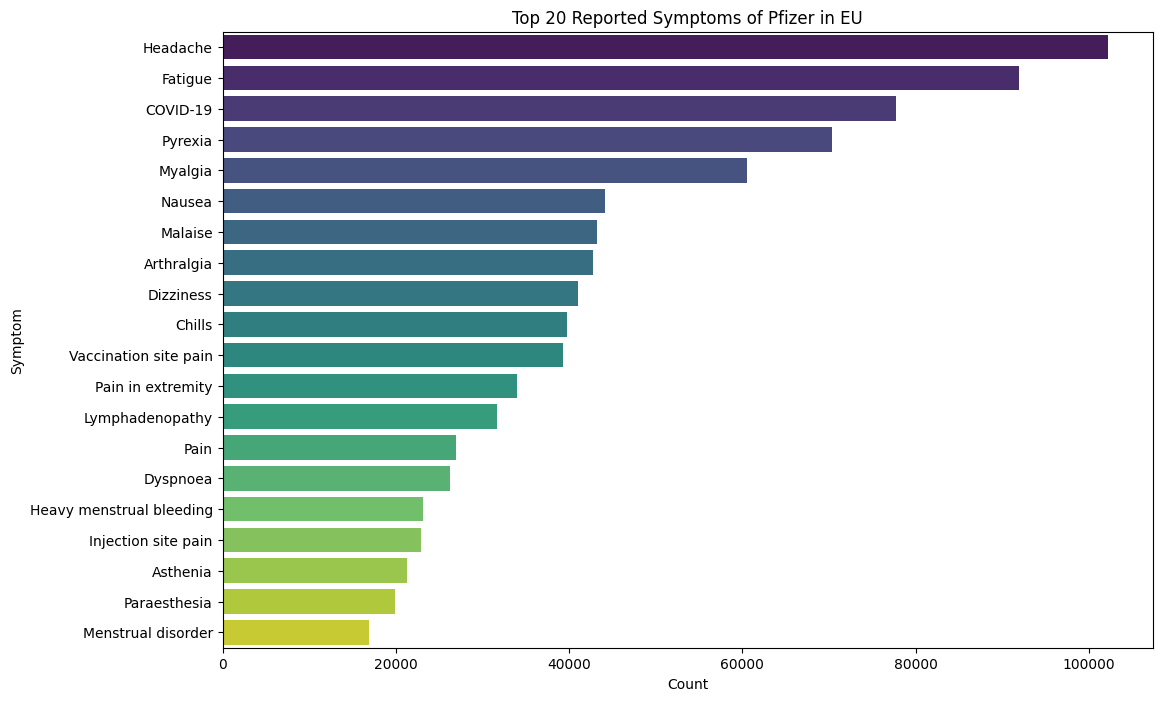

In [330]:

eu_exploded = all_symptoms.dropna(subset=['SYMPTOMS_LIST'])
reaction_counts = eu_exploded[eu_exploded['SYMPTOMS_LIST'].isin(symptoms_list)]
pfizer_symptoms = reaction_counts[reaction_counts['VAX_MANU'] == 'PFIZER']
reaction_counts1 = pfizer_symptoms['SYMPTOMS_LIST'].value_counts()


reaction_counts_df = reaction_counts1.reset_index()

reaction_counts_df.columns = ['Symptom', 'Count']

top_20_sym_pfizer = reaction_counts_df.head(20)


plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='Count', y='Symptom', data=top_20_sym_pfizer.sort_values('Count', ascending=False), palette='viridis', hue='Symptom', dodge=False, legend=False)

plt.xlabel('Count')
plt.ylabel('Symptom')
plt.title('Top 20 Reported Symptoms of Pfizer in EU')


Text(0.5, 1.0, 'Top 20 Reported Symptoms of Moderna in EU')

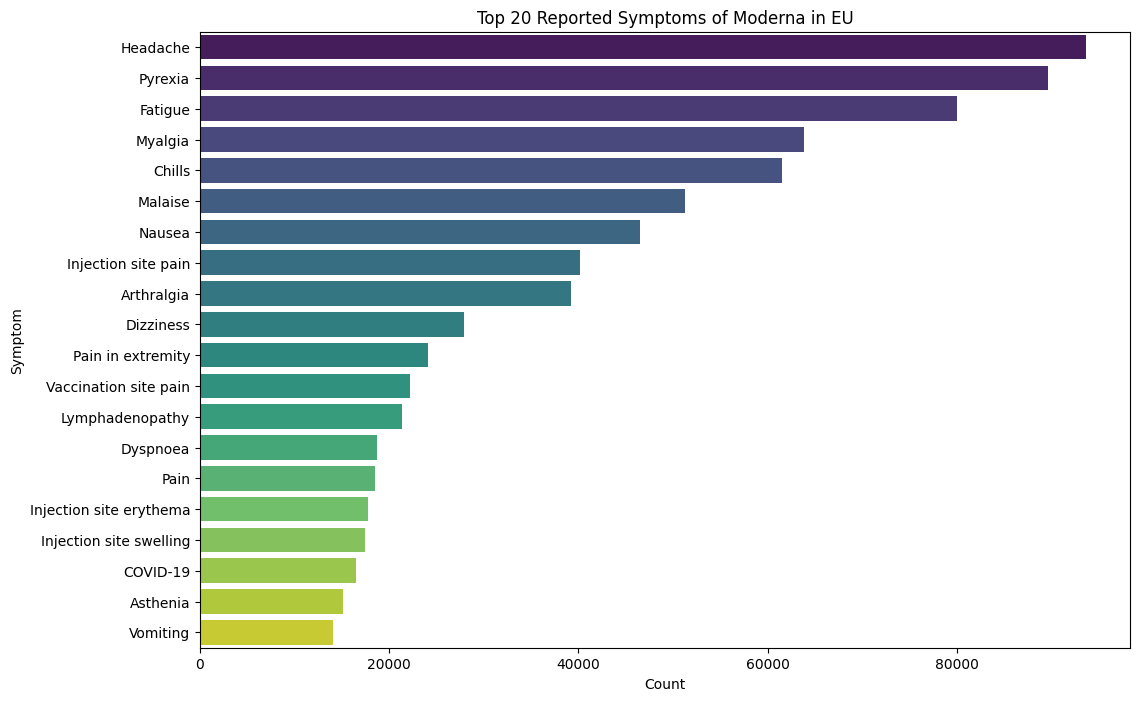

In [331]:
eu_exploded = all_symptoms.dropna(subset=['SYMPTOMS_LIST'])
reaction_counts = eu_exploded[eu_exploded['SYMPTOMS_LIST'].isin(symptoms_list)]
pfizer_symptoms = reaction_counts[reaction_counts['VAX_MANU'] == 'MODERNA']
reaction_counts1 = pfizer_symptoms['SYMPTOMS_LIST'].value_counts()


reaction_counts_df = reaction_counts1.reset_index()

reaction_counts_df.columns = ['Symptom', 'Count']

top_20_sym_moderna= reaction_counts_df.head(20)


plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='Count', y='Symptom', data=top_20_sym_moderna.sort_values('Count', ascending=False), palette='viridis', hue='Symptom', dodge=False, legend=False)

plt.xlabel('Count')
plt.ylabel('Symptom')
plt.title('Top 20 Reported Symptoms of Moderna in EU')

Text(0.5, 1.0, 'Top 20 Reported Symptoms of Astra Zeneca in EU')

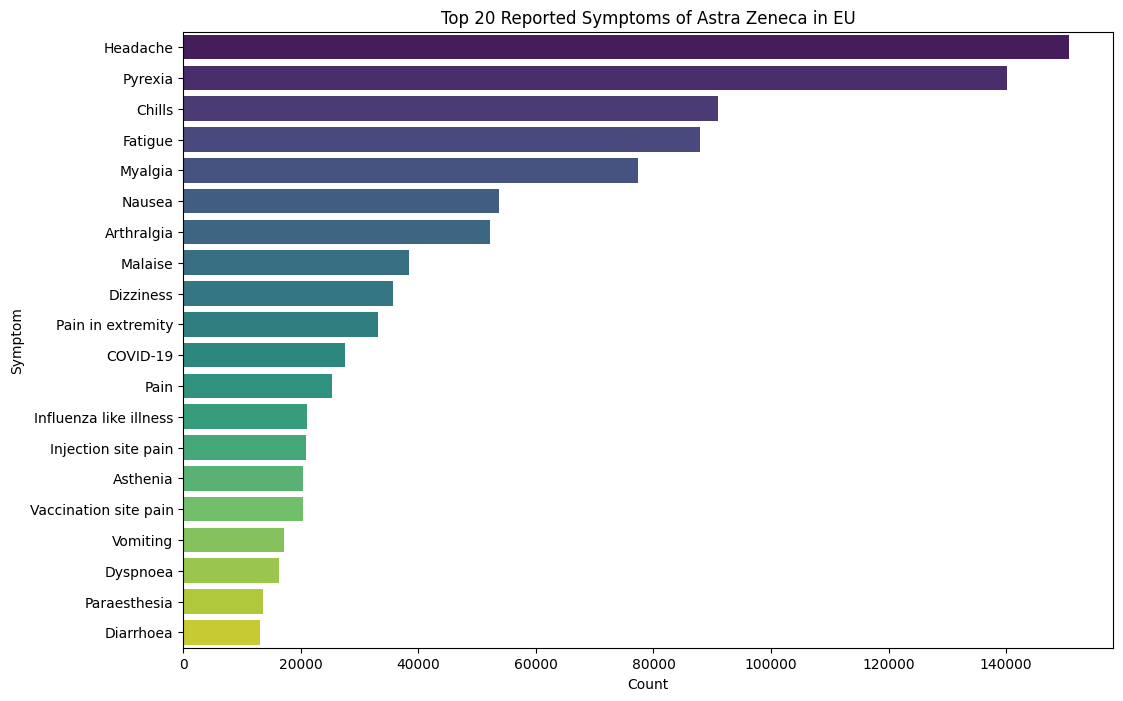

In [332]:
eu_exploded = all_symptoms.dropna(subset=['SYMPTOMS_LIST'])
reaction_counts = eu_exploded[eu_exploded['SYMPTOMS_LIST'].isin(symptoms_list)]
pfizer_symptoms = reaction_counts[reaction_counts['VAX_MANU'] == 'ASTRAZENECA']
reaction_counts1 = pfizer_symptoms['SYMPTOMS_LIST'].value_counts()


reaction_counts_df = reaction_counts1.reset_index()

reaction_counts_df.columns = ['Symptom', 'Count']

top_20_symptoms = reaction_counts_df.head(20)


plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='Count', y='Symptom', data=top_20_symptoms.sort_values('Count', ascending=False), palette='viridis', hue='Symptom', dodge=False, legend=False)

plt.xlabel('Count')
plt.ylabel('Symptom')
plt.title('Top 20 Reported Symptoms of Astra Zeneca in EU')

Text(0.5, 1.0, 'Top 20 Reported Symptoms of Janssen in EU')

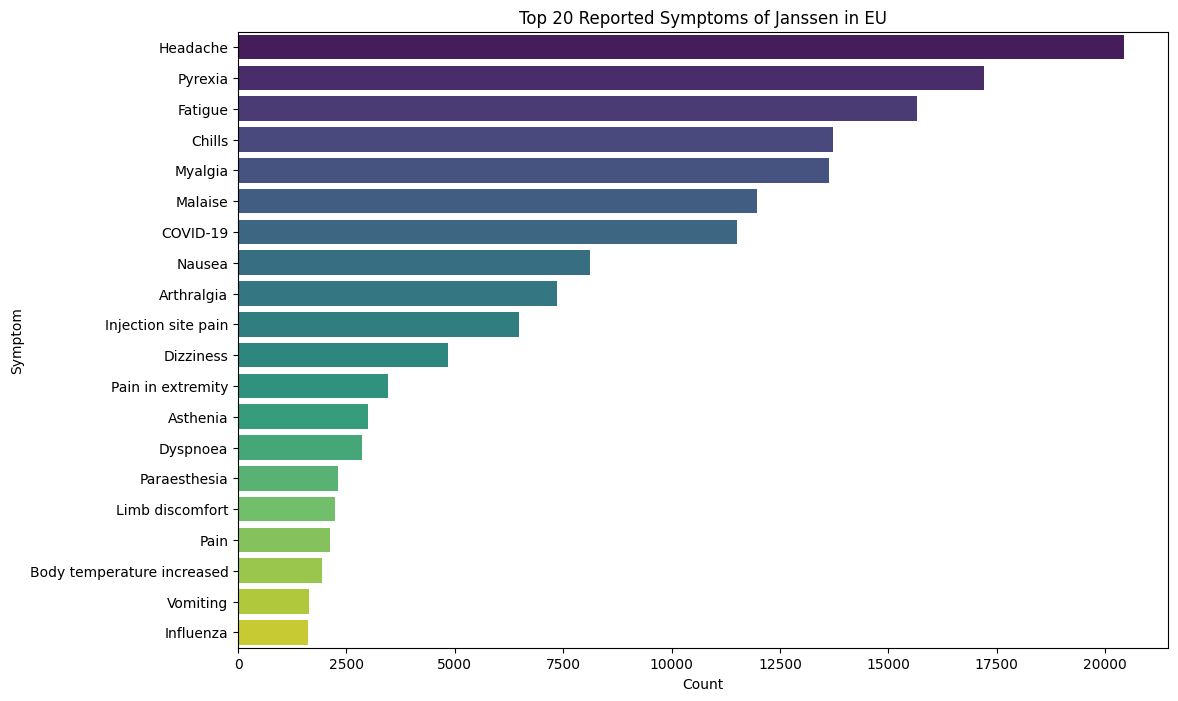

In [333]:
eu_exploded = all_symptoms.dropna(subset=['SYMPTOMS_LIST'])
reaction_counts = eu_exploded[eu_exploded['SYMPTOMS_LIST'].isin(symptoms_list)]
pfizer_symptoms = reaction_counts[reaction_counts['VAX_MANU'] == 'JANSSEN']
reaction_counts1 = pfizer_symptoms['SYMPTOMS_LIST'].value_counts()


reaction_counts_df = reaction_counts1.reset_index()

reaction_counts_df.columns = ['Symptom', 'Count']

top_20_symptoms = reaction_counts_df.head(20)


plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='Count', y='Symptom', data=top_20_symptoms.sort_values('Count', ascending=False), palette='viridis', hue='Symptom', dodge=False, legend=False)

plt.xlabel('Count')
plt.ylabel('Symptom')
plt.title('Top 20 Reported Symptoms of Janssen in EU')

         AGE_GROUP SYMPTOMS_LIST   Count
24       0-1 Month      Headache     123
102          12-17      Headache    3735
184          18-64      Headache  314761
302   2 Months - 2       Pyrexia     196
381           3-11       Pyrexia     508
423          65-85      Headache   27973
489   More than 85      COVID-19    2544
585  Not Specified      Headache   19686


<Figure size 1000x800 with 0 Axes>

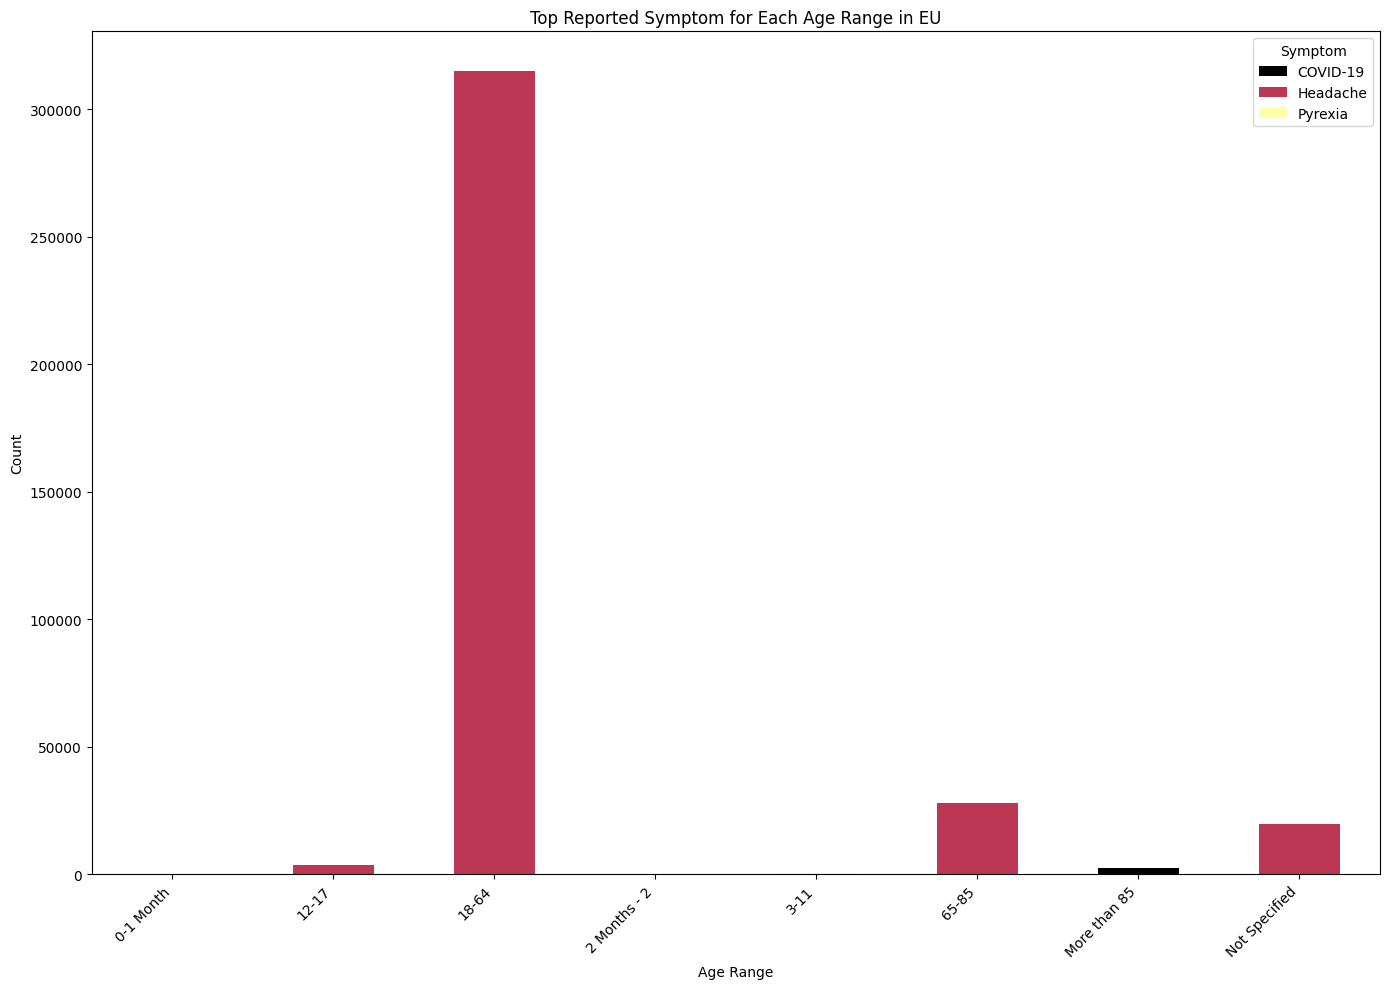

In [334]:


# Filter out NaN values in 'AGE_RANGE' and 'Symptom'
total_EU_melted = all_symptoms.dropna(subset=['AGE_GROUP', 'SYMPTOMS_LIST'])
total_EU_melted = total_EU_melted[total_EU_melted['SYMPTOMS_LIST'].isin(symptoms_list)]
#print(total_EU_melted.head(20))
# Group by 'AGE_RANGE' and 'Symptom' and count occurrences
symptom_counts_by_age_range = total_EU_melted.groupby(['AGE_GROUP', 'SYMPTOMS_LIST']).size().reset_index(name='Count')

# Identify the top symptom for each age range
top_symptom_per_age_range = symptom_counts_by_age_range.loc[symptom_counts_by_age_range.groupby('AGE_GROUP')['Count'].idxmax()]
print(top_symptom_per_age_range.head(20))

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the bar plot
top_symptom_per_age_range.pivot(index='AGE_GROUP', columns='SYMPTOMS_LIST', values='Count').plot(kind='bar', stacked=True, figsize=(14, 10), colormap='inferno')

# Set plot labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Top Reported Symptom for Each Age Range in EU')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.legend(title='Symptom')
plt.tight_layout()
plt.show()

In [335]:
y=all_symptoms['SYMPTOMS_LIST'].value_counts().head(5)
#print(y)
x = all_symptoms['VAX_MANU'].value_counts()
print(x)

VAX_MANU
PFIZER         2027684
ASTRAZENECA    1659526
MODERNA        1563055
JANSSEN         286459
NOVAVAX           7106
VIDPREVTYN        1184
VALNEVA             85
Name: count, dtype: int64


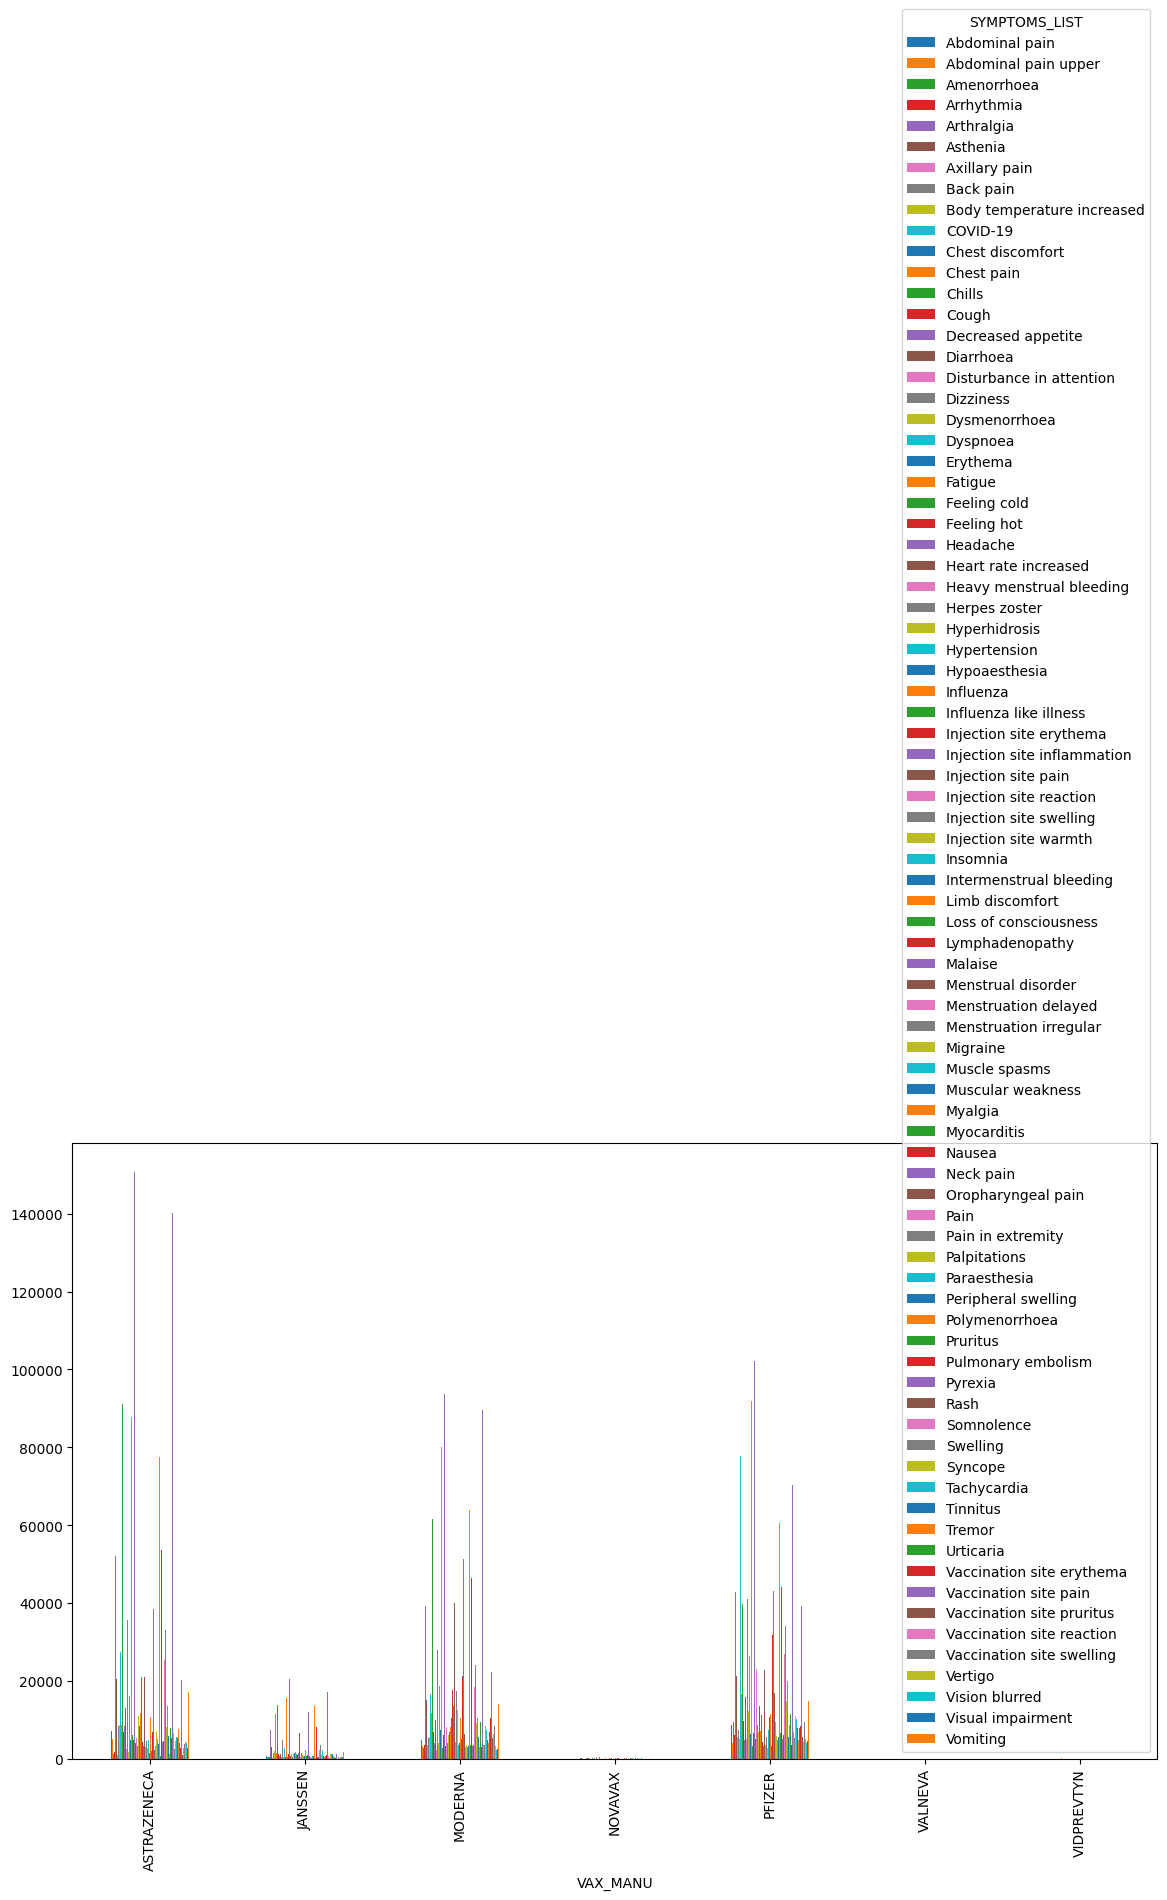

In [336]:
eu_data_filtered = all_symptoms[all_symptoms["SYMPTOMS_LIST"].isin(symptoms_list)]
eu_data_filtered

symptom_counts = eu_data_filtered.groupby(['VAX_MANU', 'SYMPTOMS_LIST']).size().unstack(fill_value=0)
symptom_counts.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.show()

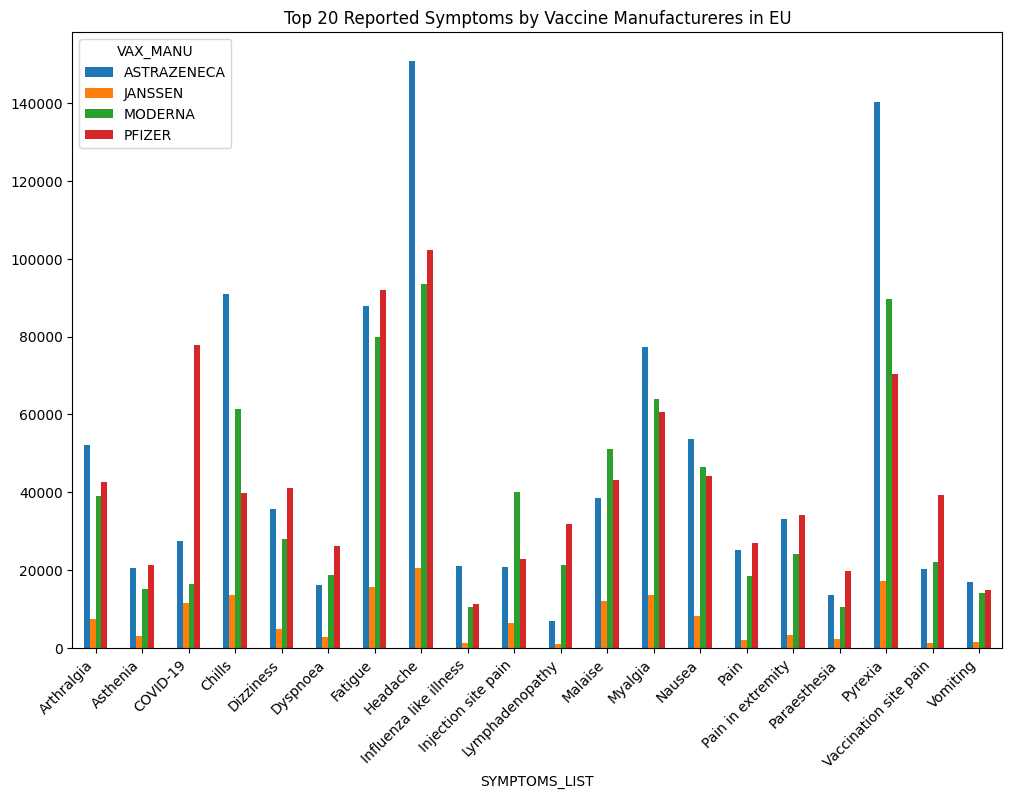

In [395]:


test_symptoms_list = ["Headache", "Pyrexia", "Fatigue", "Myalgia", "Chills", "Nausea", "Malaise", "Arthralgia", "COVID-19",
    "Dizziness", "Pain in extremity", "Injection site pain", "Vaccination site pain", "Pain", "Dyspnoea",
    "Lymphadenopathy", "Asthenia", "Vomiting", "Paraesthesia", "Influenza like illness"]
#test_symptoms_list = [symptoms_list][:20]
    
vax_manu_list = [
    "PFIZER", "MODERNA", "ASTRAZENECA", "JANSSEN"]

eu_data_filtered = all_symptoms[all_symptoms["SYMPTOMS_LIST"].isin(test_symptoms_list)]
eu_data_filtered = eu_data_filtered[eu_data_filtered["VAX_MANU"].isin(vax_manu_list)]
symptom_counts = eu_data_filtered.groupby(['SYMPTOMS_LIST','VAX_MANU']).size().unstack(fill_value=0)
symptom_counts.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Reported Symptoms by Vaccine Manufactureres in EU')
plt.show()

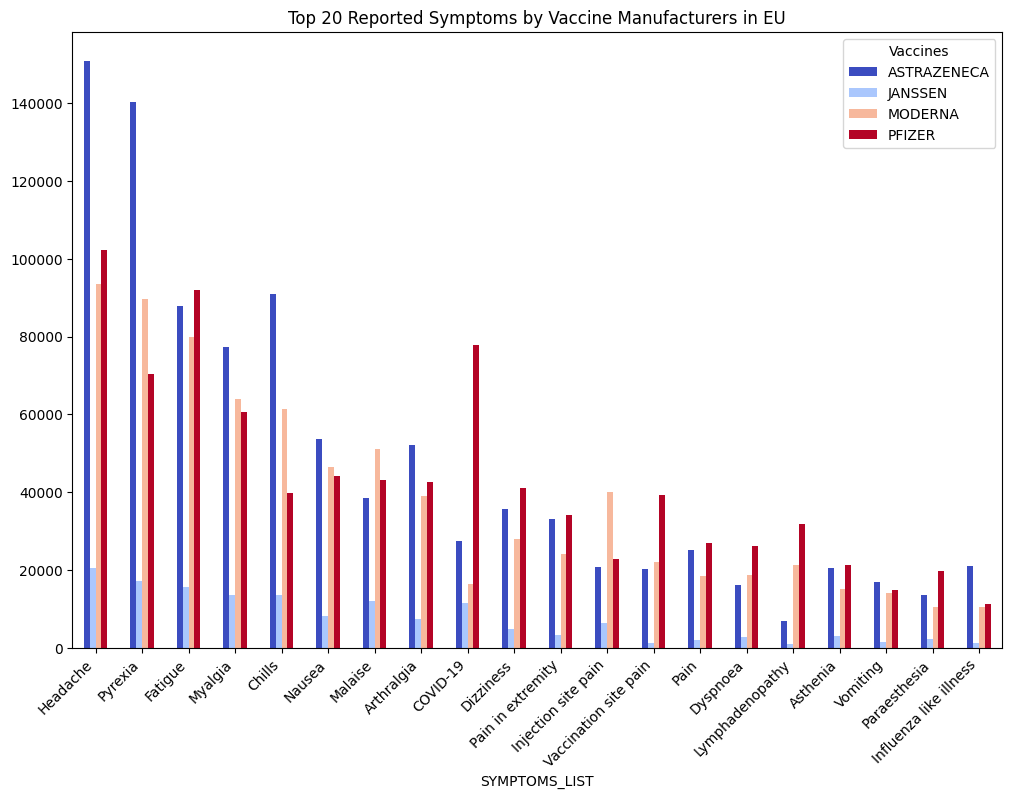

In [398]:
test_symptoms_list = [
    "Headache", "Pyrexia", "Fatigue", "Myalgia", "Chills", "Nausea", "Malaise", "Arthralgia", "COVID-19",
    "Dizziness", "Pain in extremity", "Injection site pain", "Vaccination site pain", "Pain", "Dyspnoea",
    "Lymphadenopathy", "Asthenia", "Vomiting", "Paraesthesia", "Influenza like illness"
]

vax_manu_list = ["PFIZER", "MODERNA", "ASTRAZENECA", "JANSSEN"]

eu_data_filtered = all_symptoms[all_symptoms["SYMPTOMS_LIST"].isin(test_symptoms_list)]
eu_data_filtered = eu_data_filtered[eu_data_filtered["VAX_MANU"].isin(vax_manu_list)]

# Group by symptom and vaccine manufacturer and get the counts
symptom_counts = eu_data_filtered.groupby(['SYMPTOMS_LIST', 'VAX_MANU']).size().unstack(fill_value=0)

# Sum the counts across all vaccine manufacturers for each symptom
symptom_sums = symptom_counts.sum(axis=1)

# Sort the symptoms by these sums in descending order
sorted_symptom_counts = symptom_counts.loc[symptom_sums.sort_values(ascending=False).index]

# Generate the bar plot with sorted data
ax = sorted_symptom_counts.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='coolwarm')

# Set plot title and labels
plt.title('Top 20 Reported Symptoms by Vaccine Manufacturers in EU')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vaccines')

# Display the plot
plt.show()

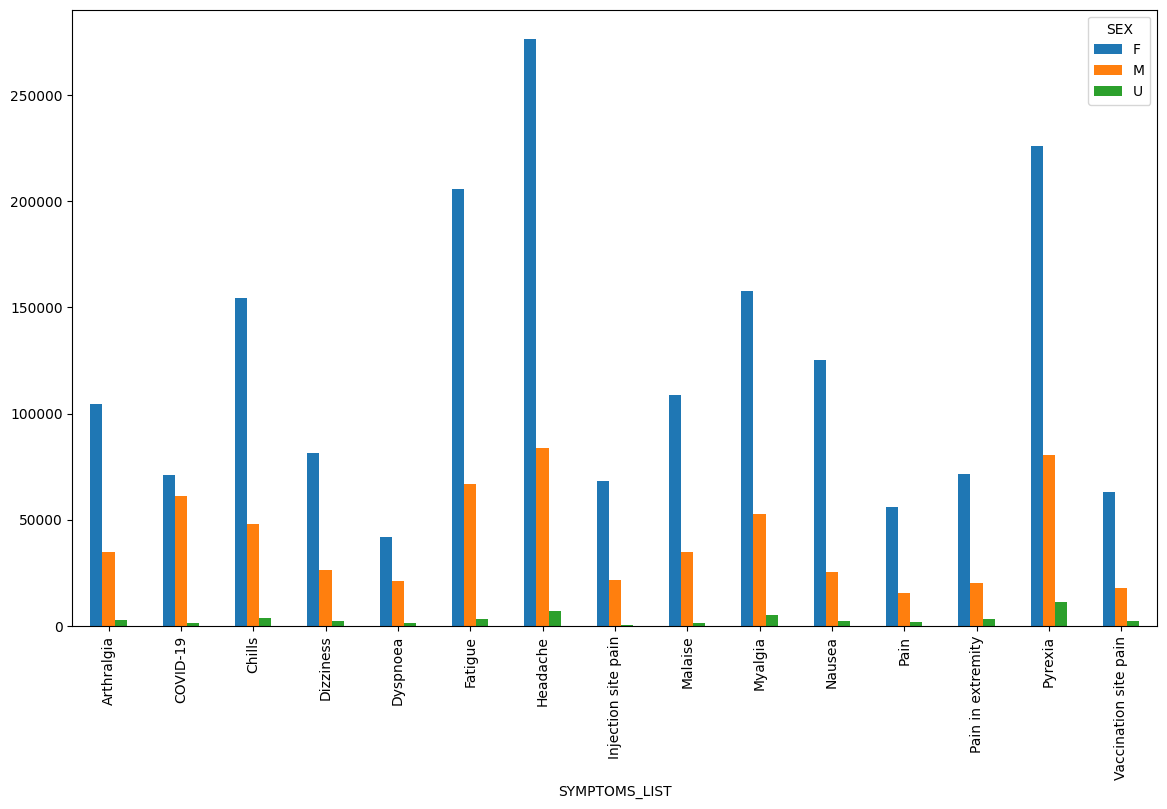

In [338]:
test_symptoms_list = [
    "Headache", "Pyrexia", "Fatigue", "Myalgia", "Chills", "Nausea", "Malaise", "Arthralgia", "COVID-19",
    "Dizziness", "Pain in extremity", "Injection site pain", "Vaccination site pain", "Pain", "Dyspnoea"
]

sex_list = ['M', 'F', 'U']
    

eu_data_filtered = all_symptoms[all_symptoms["SYMPTOMS_LIST"].isin(test_symptoms_list)]
eu_data_filtered = eu_data_filtered[eu_data_filtered["SEX"].isin(sex_list)]
symptom_counts = eu_data_filtered.groupby(['SYMPTOMS_LIST','SEX']).size().unstack(fill_value=0)
symptom_counts.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.show()

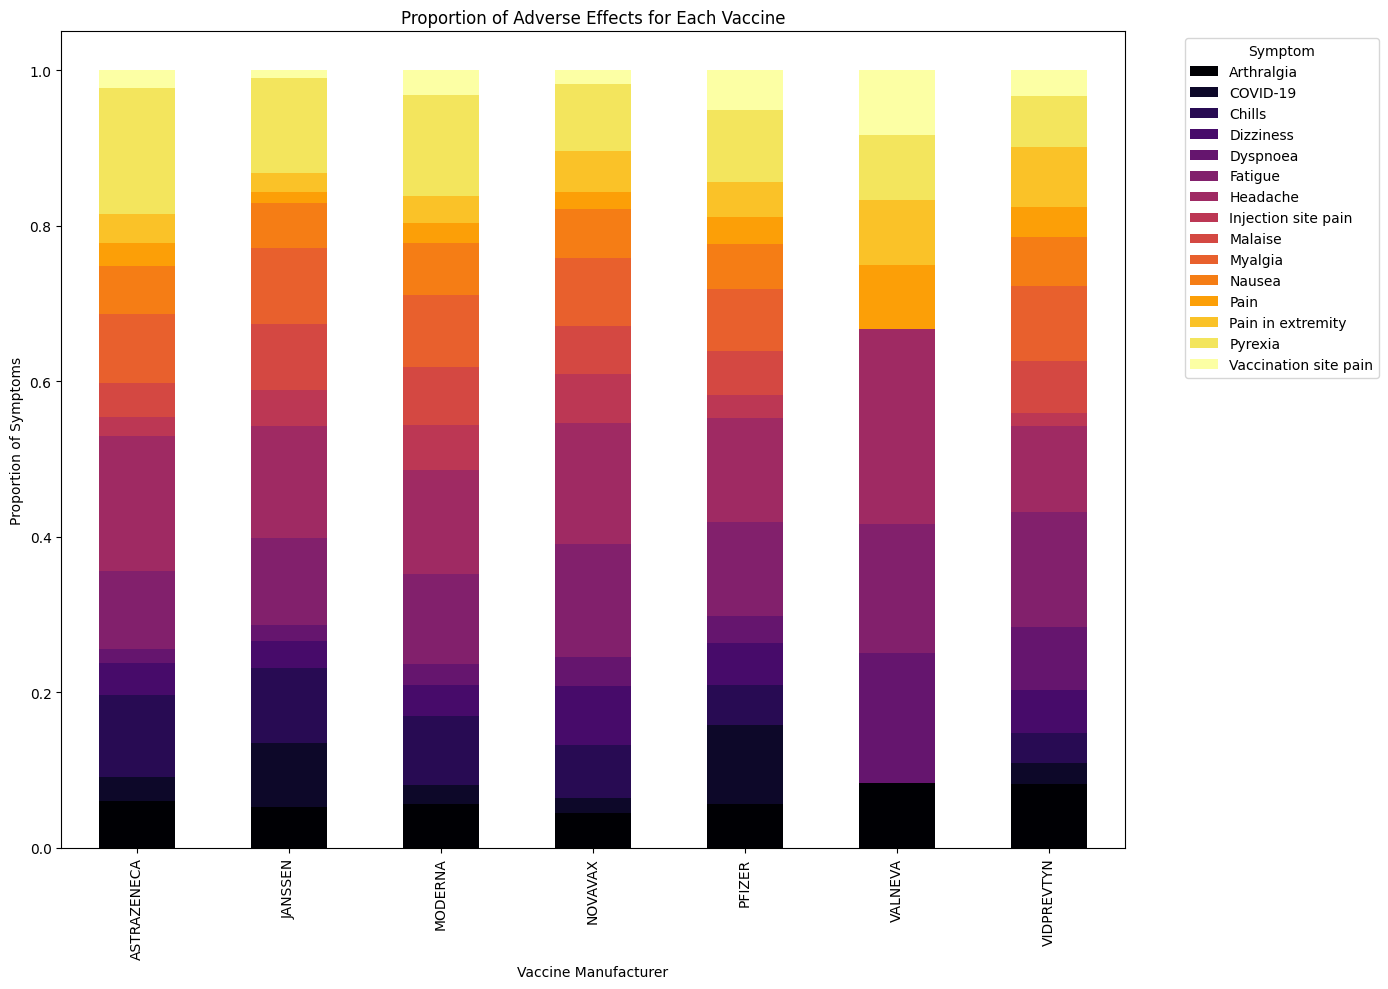

In [339]:
symptom_counts = eu_data_filtered.groupby(['SYMPTOMS_LIST', 'VAX_MANU']).size().unstack(fill_value=0)

# Normalize to get proportions
proportions = symptom_counts.div(symptom_counts.sum(axis=0), axis=1)

# Plotting
proportions.T.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='inferno')

# Add labels and title
plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Proportion of Symptoms')
plt.title('Proportion of Adverse Effects for Each Vaccine')
plt.legend(title='Symptom', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [340]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [341]:
from scipy.stats import chi2_contingency

In [342]:
symptom_counts = total_EU_melted.groupby(['VAX_MANU','SYMPTOMS_LIST']).size().unstack(fill_value=0)
print(symptom_counts.head())
chi2, p, dof, expected = chi2_contingency(symptom_counts)
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

SYMPTOMS_LIST  Abdominal pain  Abdominal pain upper  Amenorrhoea  Arrhythmia  \
VAX_MANU                                                                       
ASTRAZENECA              7050                  5182         1222        1634   
JANSSEN                   804                   447          523         452   
MODERNA                  4698                  3204         2856        3418   
NOVAVAX                    23                    16           12          53   
PFIZER                   8635                  4063         9444        5972   

SYMPTOMS_LIST  Arthralgia  Asthenia  Axillary pain  Back pain  \
VAX_MANU                                                        
ASTRAZENECA         52131     20447            837       8422   
JANSSEN              7354      3006            104       1348   
MODERNA             39163     15119           3539       5409   
NOVAVAX               117        88              9         34   
PFIZER              42721     21263           569

In [343]:

symptom_gender_counts = total_EU_melted.groupby(['SYMPTOMS_LIST', 'SEX']).size().reset_index(name='Count')

# Pivot table for better visualization
pivot_table = symptom_gender_counts.pivot(index='SYMPTOMS_LIST', columns='SEX', values='Count').fillna(0)
print(pivot_table)

SEX                             F      M     U
SYMPTOMS_LIST                                 
Abdominal pain              16409   4416   388
Abdominal pain upper        10006   2651   270
Amenorrhoea                 13964     26    67
Arrhythmia                   7132   4240   158
Arthralgia                 104366  34571  2584
...                           ...    ...   ...
Vaccination site swelling   17964   2976   624
Vertigo                      9528   3356   214
Vision blurred               7572   3054   221
Visual impairment            7031   2989   199
Vomiting                    36909   9323  1503

[82 rows x 3 columns]


In [344]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
male_counts = pivot_table['M']
female_counts = pivot_table['F']

contingency_table = pd.concat([male_counts, female_counts], axis=1)

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p_value < 0.05:
    print("There is a significant association between the counts of symptoms reported by males and females.")
else:
    print("There is no significant association between the counts of symptoms reported by males and females.")

Chi-square statistic: 141296.62314339363
P-value: 0.0
Degrees of freedom: 81
Expected frequencies:
[[  5033.0822951   15791.9177049 ]
 [  3059.00228615   9597.99771385]
 [  3381.16788996  10608.83211004]
 [  2748.43754429   8623.56245571]
 [ 33578.93660666 105358.06339334]
 [ 13539.89769115  42483.10230885]
 [  2418.05466326   7586.94533674]
 [  5348.48072943  16781.51927057]
 [  4952.11794605  15537.88205395]
 [ 31906.47900848 100110.52099152]
 [  4610.37588769  14465.62411231]
 [  9153.56344991  28720.43655009]
 [ 48914.30936961 153474.69063039]
 [  5824.11606949  18273.88393051]
 [  4279.02626817  13425.97373183]
 [  9429.32560591  29585.67439409]
 [  2468.8084343    7746.1915657 ]
 [ 26030.1590602   81672.8409398 ]
 [  4444.82192024  13946.17807976]
 [ 15196.40410414  47680.59589586]
 [  4430.56252743  13901.43747257]
 [ 65906.91359942 206791.08640058]
 [  2968.12886752   9312.87113248]
 [  4429.59578893  13898.40421107]
 [ 87073.41128596 273203.58871404]
 [  3057.06880916   9591.9

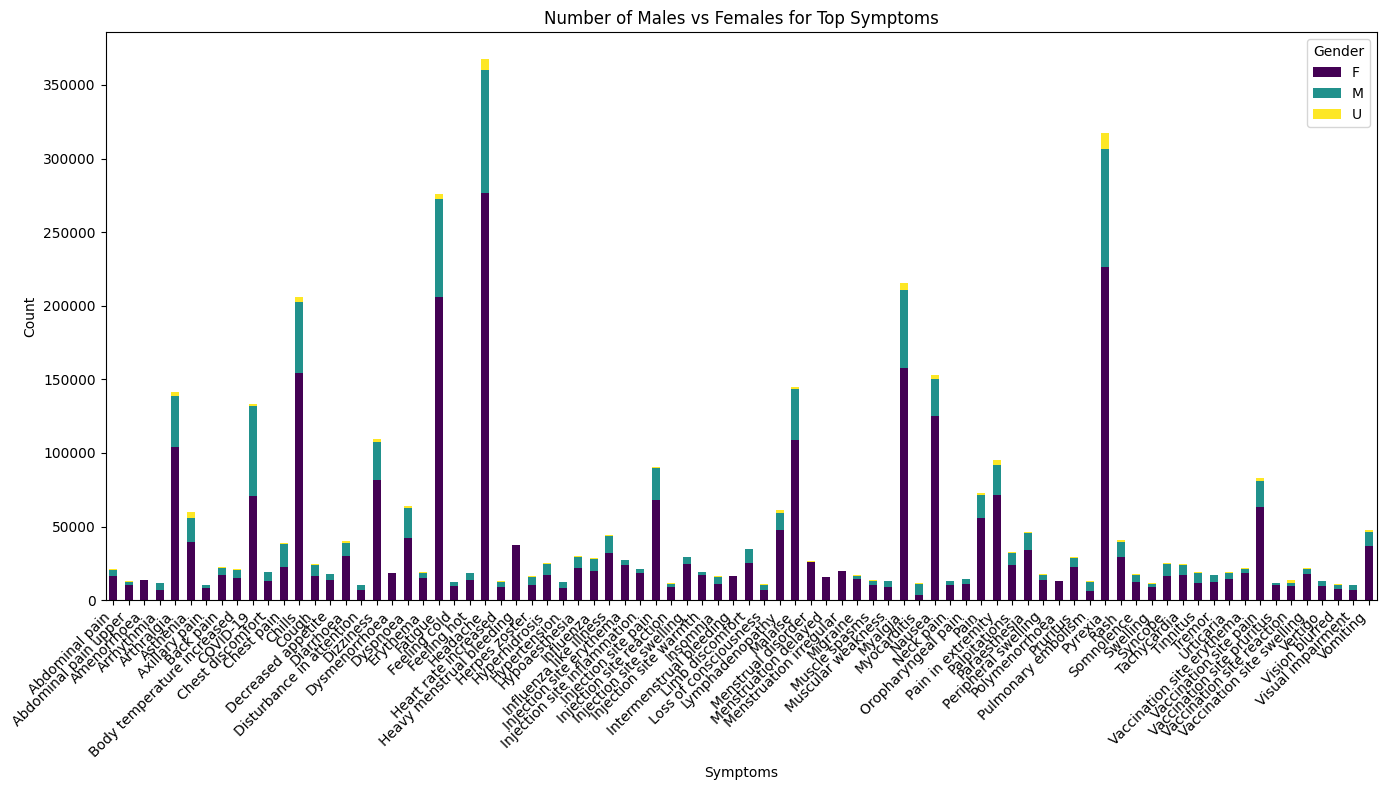

In [345]:
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.title('Number of Males vs Females for Top Symptoms')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [346]:
symptom_vaxmanu_counts = total_EU_melted.groupby(['SYMPTOMS_LIST', 'VAX_MANU']).size().reset_index(name='Count')

pivot_table1 = symptom_vaxmanu_counts.pivot(index='SYMPTOMS_LIST', columns='VAX_MANU', values='Count').fillna(0)
pivot_table_modified = pivot_table1.drop(columns=['VIDPREVTYN'])
pivot_table_modified.head()
#pivot_table_modified1 = pivot_table_modified[pivot_table_modified["SYMPTOMS_LIST"].isin(symptoms_list)]



VAX_MANU,ASTRAZENECA,JANSSEN,MODERNA,NOVAVAX,PFIZER,VALNEVA
SYMPTOMS_LIST,,,,,,
Abdominal pain,7050.0,804.0,4698.0,23.0,8635.0,0.0
Abdominal pain upper,5182.0,447.0,3204.0,16.0,4063.0,0.0
Amenorrhoea,1222.0,523.0,2856.0,12.0,9444.0,0.0
Arrhythmia,1634.0,452.0,3418.0,53.0,5972.0,0.0
Arthralgia,52131.0,7354.0,39163.0,117.0,42721.0,1.0


In [347]:
covid_vax = pd.read_csv('/Users/adi/Desktop/MS1/USDATA/covid_vax_manu.csv')

covid_vax_EU = covid_vax[covid_vax['Entity'] == 'European Union']

covid_vax_EU.head()
new_names = {'Pfizer/BioNTech': 'PFIZER', 'Moderna': 'MODERNA','Johnson&Johnson': 'JANSSEN', 'Novavax': 'NOVAVAX','Oxford/AstraZeneca': 'ASTRAZENECA', 'Valneva': 'VALNEVA' }
covid_EU_renamed = covid_vax_EU.rename(columns=new_names)

covid_EU_renamed['Day'] = pd.to_datetime(covid_EU_renamed['Day'], format='%m/%d/%y')

# Filter the DataFrame for the date range from 2021 to 2023
start_date = '2021-01-01'
end_date = '2023-12-31'
filtered_df_EU = covid_EU_renamed[(covid_EU_renamed['Day'] >= start_date) & (covid_EU_renamed['Day'] <= end_date)]
filtered_df_EU.head()
manufacturers = ['JANSSEN', 'MODERNA', 'NOVAVAX', 'PFIZER', 'ASTRAZENECA','VALNEVA']
total_doses_last_day_EU = filtered_df_EU.iloc[-1]
print(total_doses_last_day_EU)
total_doses_filtered = total_doses_last_day_EU[manufacturers]
#print(total_doses_filtered)
total_doses_df1 = pd.DataFrame(total_doses_filtered).T
#print(total_doses_df1)

# Divide the frequency of symptoms by the total number of doses administered
normalized_pivot_table1 = pivot_table_modified / total_doses_df1.values
print(normalized_pivot_table1)



Entity                    European Union
Code                                 NaN
Day                  2023-12-31 00:00:00
PFIZER                         664617234
MODERNA                        156358519
ASTRAZENECA                     67183317
JANSSEN                         18699990
Sputnik V                        1845408
Sinovac                            10664
Sinopharm/Beijing                2320667
CanSino                                0
NOVAVAX                           310008
Covaxin                              178
Medicago                               0
Sanofi/GSK                          5458
SKYCovione                             0
VALNEVA                            10193
Name: 5419, dtype: object
VAX_MANU                  ASTRAZENECA   JANSSEN   MODERNA NOVAVAX    PFIZER  \
SYMPTOMS_LIST                                                                 
Abdominal pain               0.000377  0.000005  0.015154     0.0  0.000129   
Abdominal pain upper         0.000277  0

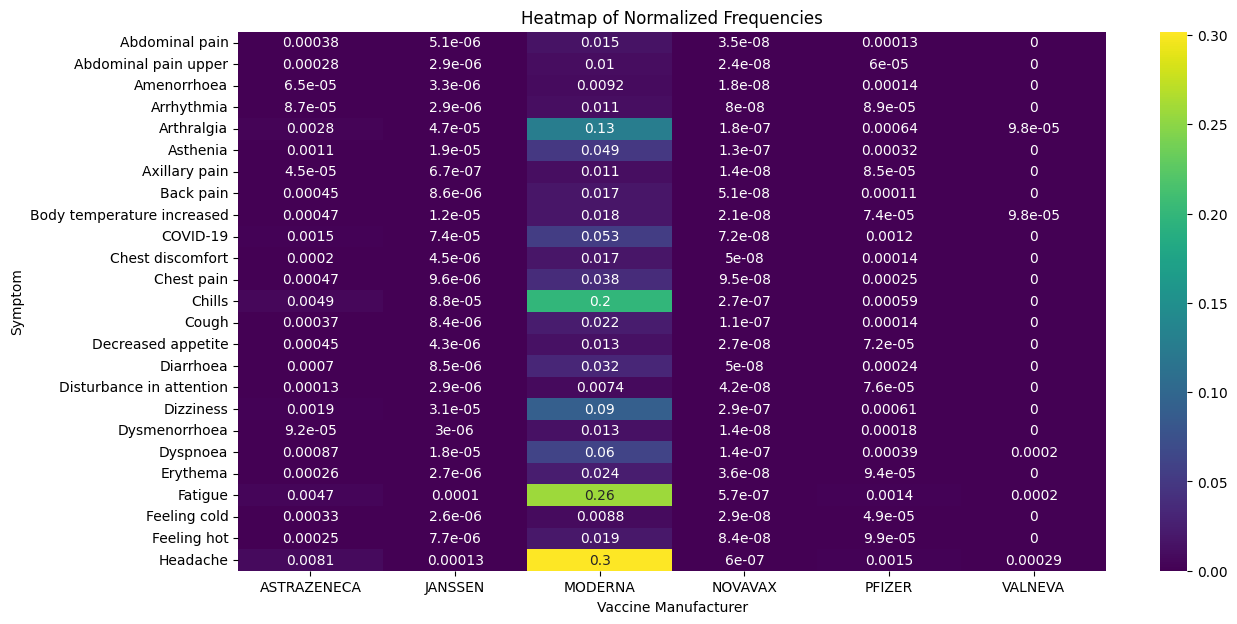

In [405]:
normalized_pivot_table = normalized_pivot_table1.head(25).apply(pd.to_numeric, errors='coerce')

# Fill any NaN values with 0 (or another appropriate value if needed)
#normalized_pivot_table = normalized_pivot_table.fillna(0)
plt.figure(figsize=(14, 7))
sns.heatmap(normalized_pivot_table, annot=True, cmap='viridis')
plt.title('Heatmap of Normalized Frequencies')
plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Symptom')
plt.show()

  Vaccine Manufacturer Symptom with Highest Normalized Frequency  \
0          ASTRAZENECA                                  Headache   
1              JANSSEN                                  Headache   
2              MODERNA                                  Headache   
3              NOVAVAX                                  Headache   
4               PFIZER                                  Headache   
5              VALNEVA                                  Headache   

   Highest Normalized Frequency  
0                  8.058240e-03  
1                  1.307060e-04  
2                  3.018729e-01  
3                  6.048594e-07  
4                  1.521836e-03  
5                  2.943196e-04  


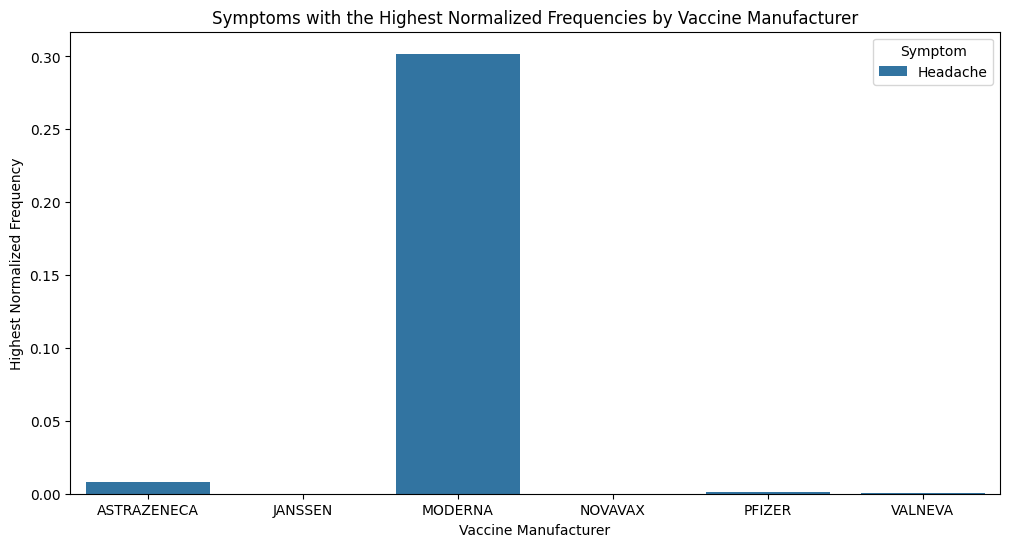

In [349]:
normalized_pivot_table = normalized_pivot_table1.apply(pd.to_numeric, errors='coerce')

# Fill any NaN values with 0 (or another appropriate value if needed)
#normalized_pivot_table = normalized_pivot_table.fillna(0)

# Find the symptom with the highest normalized frequency for each vaccine manufacturer
max_symptoms = normalized_pivot_table.idxmax()
max_values = normalized_pivot_table.max()

# Create a DataFrame to display the results
highest_normalized_frequencies = pd.DataFrame({
    'Vaccine Manufacturer': max_symptoms.index,
    'Symptom with Highest Normalized Frequency': max_symptoms.values,
    'Highest Normalized Frequency': max_values.values
})

print(highest_normalized_frequencies)

# Visualization (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Vaccine Manufacturer',
    y='Highest Normalized Frequency',
    hue='Symptom with Highest Normalized Frequency',
    data=highest_normalized_frequencies,
    dodge=False
)
plt.title('Symptoms with the Highest Normalized Frequencies by Vaccine Manufacturer')
plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Highest Normalized Frequency')
plt.legend(title='Symptom')
plt.show()

In [390]:
ormalized_pivot_table = normalized_pivot_table1.apply(pd.to_numeric, errors='coerce')

# Dictionary to store t-test results
ttest_results = {}

# Perform pairwise t-tests for each symptom across different manufacturers
manufacturers = normalized_pivot_table.columns
for i in range(len(manufacturers)):
    for j in range(i + 1, len(manufacturers)):
        manu1 = manufacturers[i]
        manu2 = manufacturers[j]
        values1 = normalized_pivot_table[manu1]
        values2 = normalized_pivot_table[manu2]
        # Check for NaN values
        #if not values1.isnull().values.any() and not values2.isnull().values.any() and len(values1) > 1 and len(values2) > 1:
        t_statistic, p_value = ttest_ind(values1, values2)
        ttest_results[f'{manu1} vs {manu2}'] = (t_statistic, p_value)  
            # Interpretation of results
        if p_value < 0.05:   
            print(f"There is a significant difference between {manu1} and {manu2}.")
        else:   
            print(f"There is no significant difference between {manu1} and {manu2}.")

# Display all t-test results
print("\nT-Test Results for Each Pair of Manufacturers:")
for pair, result in ttest_results.items():
    print(f"{pair}: T-Statistic: {result[0]}, P-Value: {result[1]}")

There is a significant difference between ASTRAZENECA and JANSSEN.
There is a significant difference between ASTRAZENECA and MODERNA.
There is a significant difference between ASTRAZENECA and NOVAVAX.
There is a significant difference between ASTRAZENECA and PFIZER.
There is a significant difference between ASTRAZENECA and VALNEVA.
There is a significant difference between JANSSEN and MODERNA.
There is a significant difference between JANSSEN and NOVAVAX.
There is a significant difference between JANSSEN and PFIZER.
There is no significant difference between JANSSEN and VALNEVA.
There is a significant difference between MODERNA and NOVAVAX.
There is a significant difference between MODERNA and PFIZER.
There is a significant difference between MODERNA and VALNEVA.
There is a significant difference between NOVAVAX and PFIZER.
There is a significant difference between NOVAVAX and VALNEVA.
There is a significant difference between PFIZER and VALNEVA.

T-Test Results for Each Pair of Manufa

In [389]:
# ################### used this test for Q2####################
from scipy.stats import chi2_contingency
import numpy as np
chi2_results = {}
total_doses = {
    'JANSSEN': 18699990,
    'MODERNA': 156358519,
    'NOVAVAX': 310008,
    'PFIZER': 664617234,
    'VALNEVA': 10193,
    'ASTRAZENECA': 67183317
}


# Perform pairwise chi-squared test for each symptom across different manufacturers
manufacturers = normalized_pivot_table1.columns
for i in range(len(manufacturers)):
    for j in range(i + 1, len(manufacturers)):
        manu1 = manufacturers[i]
        manu2 = manufacturers[j]
        for symptom in normalized_pivot_table1.index:
            # Create contingency table for this symptom and pair of manufacturers
            count1 = normalized_pivot_table1.loc[symptom, manu1] * total_doses[manu1]
            count2 = normalized_pivot_table1.loc[symptom, manu2] * total_doses[manu2]
            contingency_table = np.array([
                [count1, total_doses[manu1] - count1],
                [count2, total_doses[manu2] - count2]
            ])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            chi2_results[f'{symptom}: {manu1} vs {manu2}'] = (chi2, p)

            if p < 0.05:
                print(f"There is a significant difference in {symptom} between {manu1} and {manu2}. Chi2: {chi2}, P-value: {p}")
            else:
                print(f"There is no significant difference in {symptom} between {manu1} and {manu2}. Chi2: {chi2}, P-value: {p}")

# Display all chi-squared test results
print("\nChi-Squared Test Results for Each Pair of Manufacturers:")
for pair, result in chi2_results.items():
    print(f"{pair}: Chi2: {result[0]}, P-Value: {result[1]}")

There is a significant difference in Abdominal pain between ASTRAZENECA and JANSSEN. Chi2: 6833.825985127817, P-value: 0.0
There is a significant difference in Abdominal pain upper between ASTRAZENECA and JANSSEN. Chi2: 5060.937709508703, P-value: 0.0
There is a significant difference in Amenorrhoea between ASTRAZENECA and JANSSEN. Chi2: 1083.510688565687, P-value: 1.2669719411917305e-237
There is a significant difference in Arrhythmia between ASTRAZENECA and JANSSEN. Chi2: 1512.61351714516, P-value: 0.0
There is a significant difference in Arthralgia between ASTRAZENECA and JANSSEN. Chi2: 50260.1666784713, P-value: 0.0
There is a significant difference in Asthenia between ASTRAZENECA and JANSSEN. Chi2: 19653.839703090893, P-value: 0.0
There is a significant difference in Axillary pain between ASTRAZENECA and JANSSEN. Chi2: 807.7373319030111, P-value: 1.1215946613662422e-177
There is a significant difference in Back pain between ASTRAZENECA and JANSSEN. Chi2: 8061.31779321363, P-value:

In [402]:
normalized_pivot_table1.head(70)

VAX_MANU,ASTRAZENECA,JANSSEN,MODERNA,NOVAVAX,PFIZER,VALNEVA
SYMPTOMS_LIST,,,,,,
Abdominal pain,0.000377,0.000005,0.015154,0.0,0.000129,0.0
Abdominal pain upper,0.000277,0.000003,0.010335,0.0,0.00006,0.0
Amenorrhoea,0.000065,0.000003,0.009213,0.0,0.000141,0.0
Arrhythmia,0.000087,0.000003,0.011026,0.0,0.000089,0.0
Arthralgia,0.002788,0.000047,0.126329,0.0,0.000636,0.000098
...,...,...,...,...,...,...
Rash,0.000531,0.000008,0.043438,0.0,0.000235,0.0
Somnolence,0.000353,0.000004,0.011242,0.0,0.0001,0.000098
Swelling,0.000135,0.000002,0.011287,0.0,0.00008,0.0


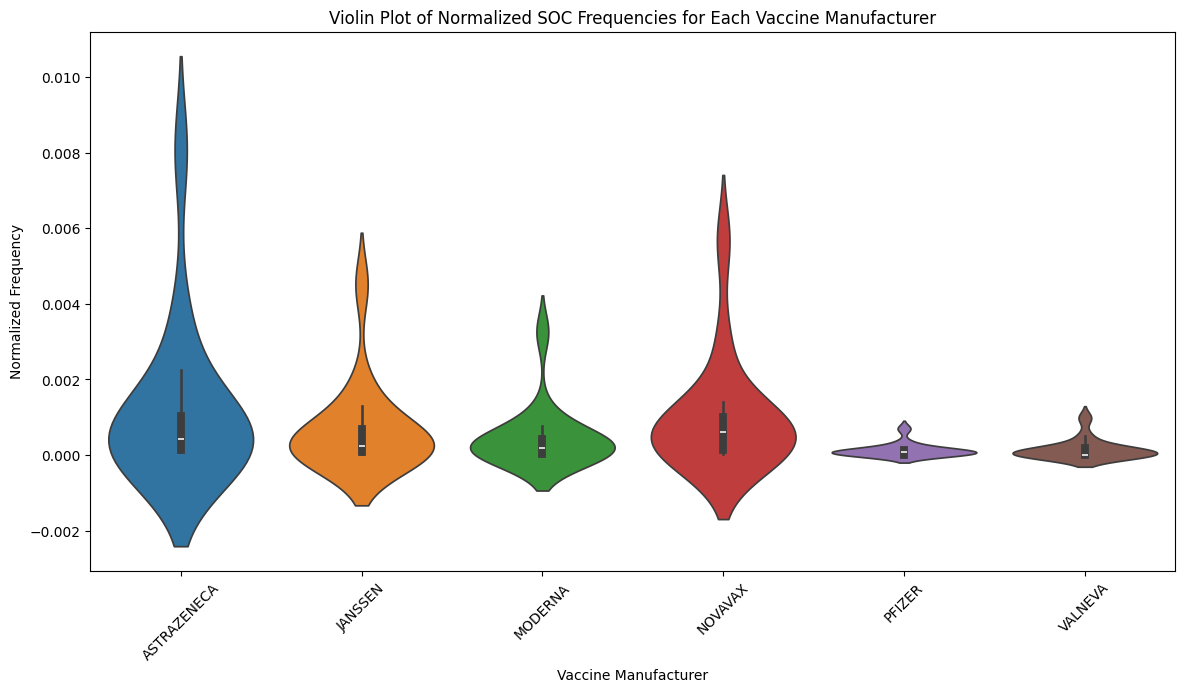

In [350]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=normalized_pivot_table6)
plt.title('Violin Plot of Normalized SOC Frequencies for Each Vaccine Manufacturer')
plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Normalized Frequency')
plt.xticks(rotation=45)
plt.show()

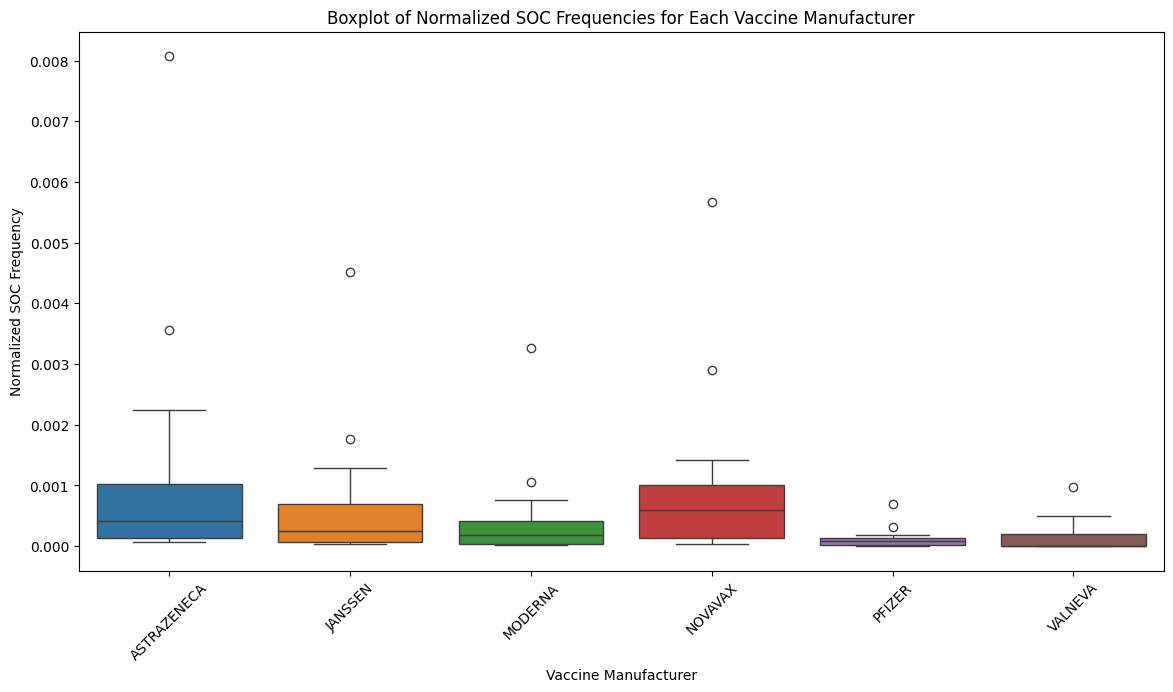

In [351]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=normalized_pivot_table6)
plt.title('Boxplot of Normalized SOC Frequencies for Each Vaccine Manufacturer')
plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Normalized SOC Frequency')
plt.xticks(rotation=45)
plt.show()

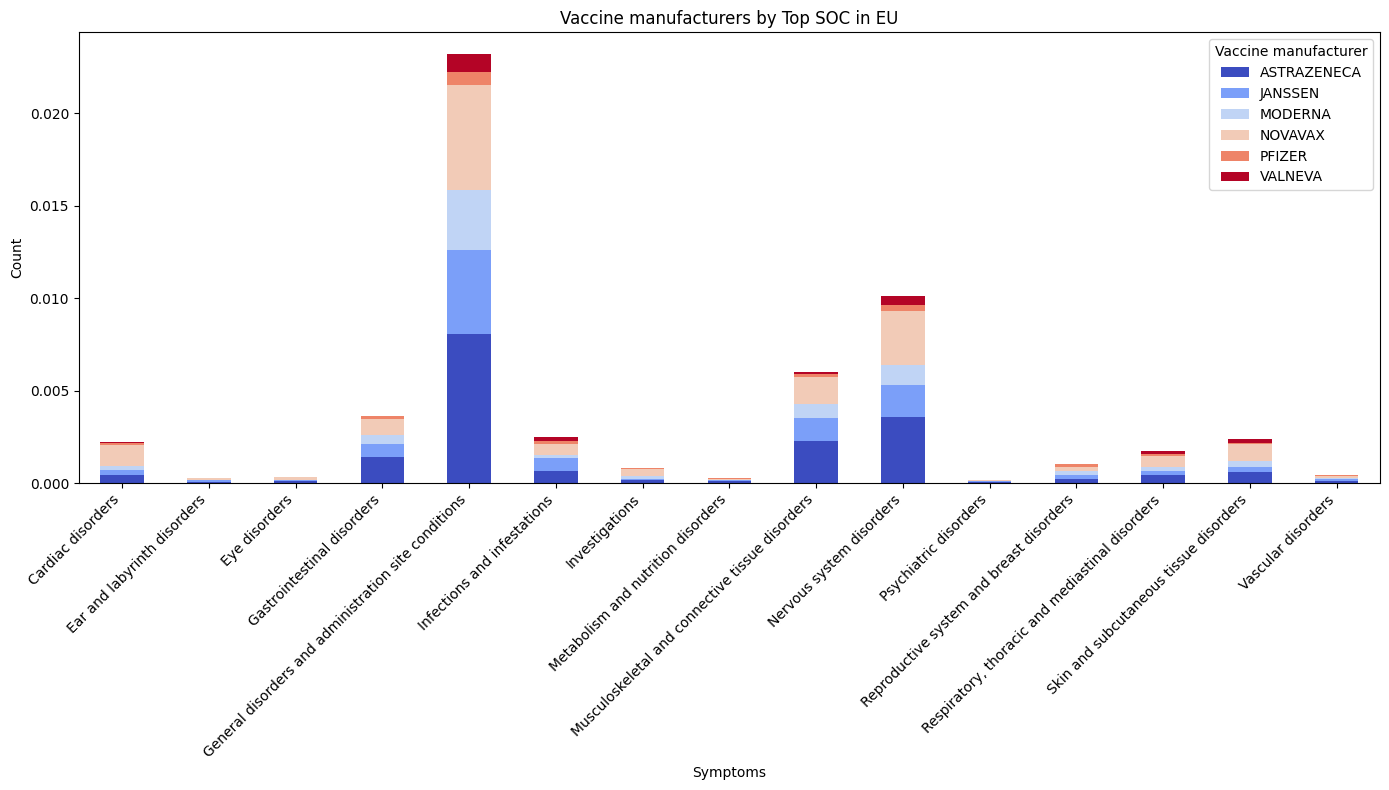

In [352]:
normalized_pivot_table6.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')

plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.title('Vaccine manufacturers by Top SOC in EU')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vaccine manufacturer')
plt.tight_layout()
plt.show()

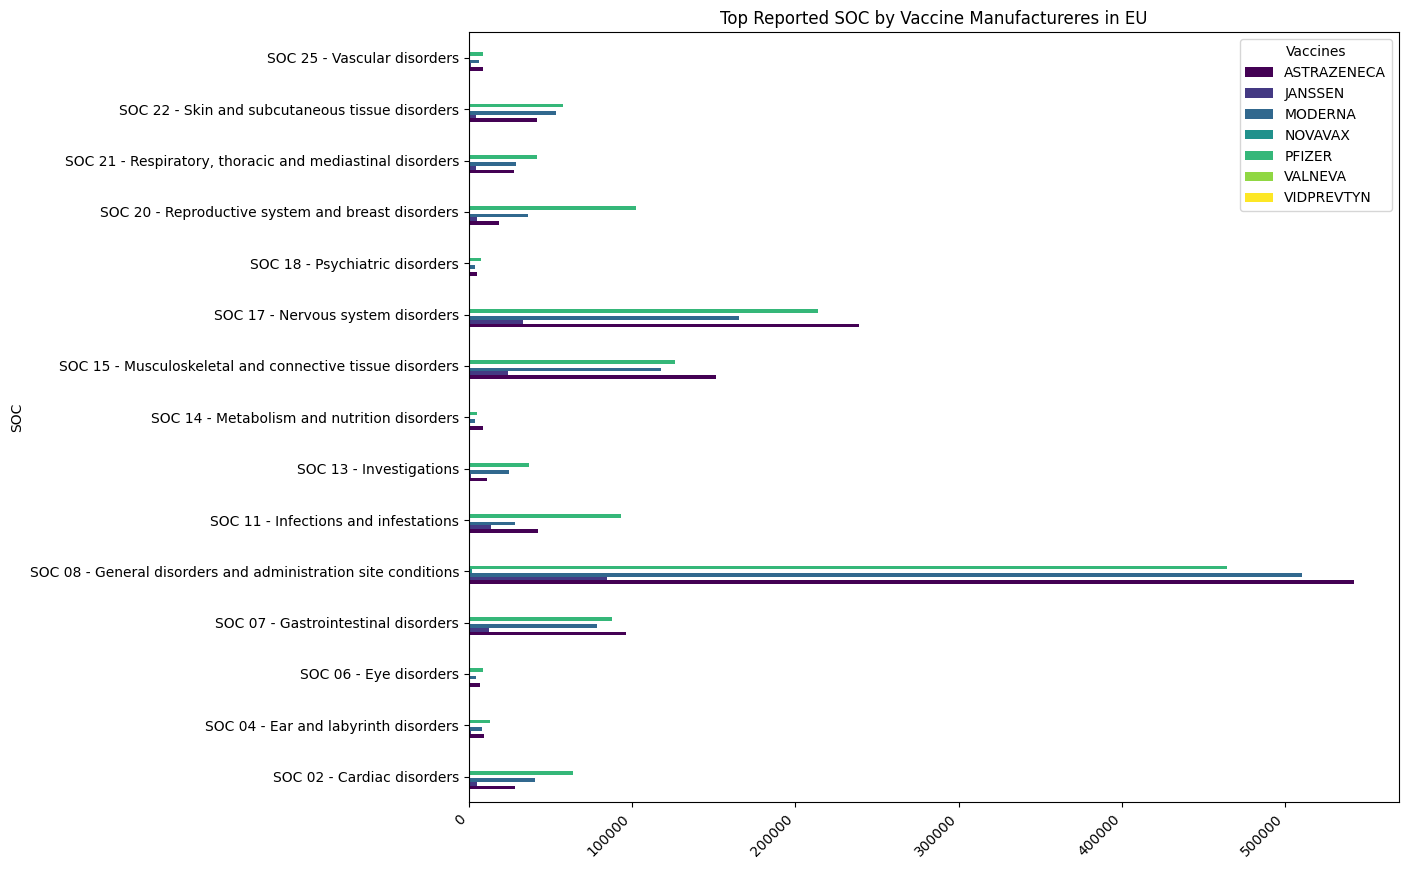

In [357]:
soc_counts_by_vaccine = eu_data_filtered2.groupby(["SOC", "VAX_MANU"]).size().unstack(fill_value=0)
soc_counts_by_vaccine.plot(kind='barh', stacked=False, figsize=(12, 10), colormap='viridis')
plt.title('Top Reported SOC by Vaccine Manufactureres in EU')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vaccines')

In [353]:
from scipy.stats import chi2_contingency
import numpy as np
chi2_results = {}
total_doses = {
    'JANSSEN': 18699990,
    'MODERNA': 156358519,
    'NOVAVAX': 310008,
    'PFIZER': 664617234,
    'VALNEVA': 10193,
    'ASTRAZENECA': 67183317
}


# Perform pairwise chi-squared test for each symptom across different manufacturers
manufacturers = normalized_pivot_table6.columns
for i in range(len(manufacturers)):
    for j in range(i + 1, len(manufacturers)):
        manu1 = manufacturers[i]
        manu2 = manufacturers[j]
        for symptom in normalized_pivot_table6.index:
            # Create contingency table for this symptom and pair of manufacturers
            count1 = normalized_pivot_table6.loc[symptom, manu1] * total_doses[manu1]
            count2 = normalized_pivot_table6.loc[symptom, manu2] * total_doses[manu2]
            contingency_table = np.array([
                [count1, total_doses[manu1] - count1],
                [count2, total_doses[manu2] - count2]
            ])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            chi2_results[f'{symptom}: {manu1} vs {manu2}'] = (chi2, p)

            if p < 0.05:
                print(f"There is a significant difference in {symptom} between {manu1} and {manu2}. Chi2: {chi2}, P-value: {p}")
            else:
                print(f"There is no significant difference in {symptom} between {manu1} and {manu2}. Chi2: {chi2}, P-value: {p}")

# Display all chi-squared test results
print("\nChi-Squared Test Results for Each Pair of Manufacturers:")
for pair, result in chi2_results.items():
    print(f"{pair}: Chi2: {result[0]}, P-Value: {result[1]}")

There is a significant difference in Cardiac disorders between ASTRAZENECA and JANSSEN. Chi2: 989.5207070658752, P-value: 3.404853448670734e-217
There is a significant difference in Ear and labyrinth disorders between ASTRAZENECA and JANSSEN. Chi2: 53.81875205096129, P-value: 2.1986422023409863e-13
There is a significant difference in Eye disorders between ASTRAZENECA and JANSSEN. Chi2: 333.94414764647996, P-value: 1.329725338173335e-74
There is a significant difference in Gastrointestinal disorders between ASTRAZENECA and JANSSEN. Chi2: 6873.000884534085, P-value: 0.0
There is a significant difference in General disorders and administration site conditions between ASTRAZENECA and JANSSEN. Chi2: 25528.36090958692, P-value: 0.0
There is a significant difference in Infections and infestations between ASTRAZENECA and JANSSEN. Chi2: 190.87487551477335, P-value: 2.0481740879883255e-43
There is a significant difference in Investigations between ASTRAZENECA and JANSSEN. Chi2: 676.451179635761

In [413]:
import re

data = pd.read_csv('/Users/adi/Desktop/MS1/Chi square.csv')

# Extract information from the text results
summary_data = []

for result in data.iloc[:, 0]:  # The results are in the first column
    match = re.search(r'There is a significant difference in (.*) between (.*) and (.*)\. Chi2: (.*), P-value: (.*)', result)
    if match:
        symptom, vaccine1, vaccine2, chi2, p_value = match.groups()
        summary_data.append({
            'Symptom': symptom,
            'Vaccine 1': vaccine1,
            'Vaccine 2': vaccine2,
            'Chi2': float(chi2),
            'P-value': float(p_value)
        })

# Convert the summary data to a DataFrame
summary_df = pd.DataFrame(summary_data).head(20)
print(summary_df)

# Pivot table with chi-squared values
pivot_table = summary_df.pivot_table(index='Symptom', columns='Vaccine 1', values='p_value')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Chi-Squared Values for Each Symptom Across Vaccine Manufacturers')
plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Symptom')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

                       Symptom    Vaccine 1 Vaccine 2          Chi2  \
0         Abdominal pain upper  ASTRAZENECA   JANSSEN   5060.937710   
1                  Amenorrhoea  ASTRAZENECA   JANSSEN   1083.510689   
2                   Arrhythmia  ASTRAZENECA   JANSSEN   1512.613517   
3                   Arthralgia  ASTRAZENECA   JANSSEN  50260.166678   
4                     Asthenia  ASTRAZENECA   JANSSEN  19653.839703   
5                Axillary pain  ASTRAZENECA   JANSSEN    807.737332   
6                    Back pain  ASTRAZENECA   JANSSEN   8061.317793   
7   Body temperature increased  ASTRAZENECA   JANSSEN   8263.676410   
8                     COVID-19  ASTRAZENECA   JANSSEN  24444.726864   
9             Chest discomfort  ASTRAZENECA   JANSSEN   3582.495546   
10                  Chest pain  ASTRAZENECA   JANSSEN   8342.757770   
11                      Chills  ASTRAZENECA   JANSSEN  87653.336688   
12                       Cough  ASTRAZENECA   JANSSEN   6478.769400   
13    

KeyError: 'p_value'

In [355]:

symptom_counts_by_age_range = total_EU_melted.groupby(['AGE_GROUP', 'SYMPTOMS_LIST']).size().reset_index(name='Count')
symptom_counts_by_age_range.head()
pivot_table4 = symptom_counts_by_age_range.pivot(index='SYMPTOMS_LIST', columns='AGE_GROUP', values='Count').fillna(0)

print(pivot_table4.head())


AGE_GROUP             0-1 Month  12-17     18-64  2 Months - 2   3-11  \
SYMPTOMS_LIST                                                           
Abdominal pain             10.0  578.0   16731.0          23.0  118.0   
Abdominal pain upper        2.0  180.0   10265.0           5.0   33.0   
Amenorrhoea                 1.0  453.0   12692.0           2.0    1.0   
Arrhythmia                  4.0   87.0    8893.0           0.0    7.0   
Arthralgia                 18.0  601.0  116584.0          23.0   48.0   

AGE_GROUP               65-85  More than 85  Not Specified  
SYMPTOMS_LIST                                               
Abdominal pain         2244.0         188.0         1321.0  
Abdominal pain upper   1432.0          81.0          929.0  
Amenorrhoea               5.0           0.0          903.0  
Arrhythmia             1805.0         121.0          613.0  
Arthralgia            14900.0         487.0         8860.0  


In [356]:
# T test for number of symptoms between age groups
from scipy.stats import ttest_ind
age_groups = pivot_table4.columns.tolist()

# Perform independent t-tests between each pair of age groups
for i, group1 in enumerate(age_groups):
    for group2 in age_groups[i+1:]:
        # Extract the number of symptoms for each age group
        symptoms_group1 = pivot_table4[group1].values
        symptoms_group2 = pivot_table4[group2].values
        
        # Perform independent t-test
        t_statistic, p_value = ttest_ind(symptoms_group1, symptoms_group2)
        
        # Display the results
        print(f"Independent t-test results between {group1} and {group2}:")
        print(f"T-statistic: {t_statistic}")
        print(f"P-value: {p_value}")
        
        # Interpretation
        if p_value < 0.05:
            print("There is a significant difference in the total number of symptoms between the two age groups.")
        else:
            print("There is no significant difference in the total number of symptoms between the two age groups.")
        print()

Independent t-test results between 0-1 Month and 12-17:
T-statistic: -6.629199209556126
P-value: 4.778613874898901e-10
There is a significant difference in the total number of symptoms between the two age groups.

Independent t-test results between 0-1 Month and 18-64:
T-statistic: -6.186538543251343
P-value: 4.836827075427121e-09
There is a significant difference in the total number of symptoms between the two age groups.

Independent t-test results between 0-1 Month and 2 Months - 2:
T-statistic: 0.20177035739846325
P-value: 0.8403493985303062
There is no significant difference in the total number of symptoms between the two age groups.

Independent t-test results between 0-1 Month and 3-11:
T-statistic: -3.7621714239775974
P-value: 0.00023504237589595196
There is a significant difference in the total number of symptoms between the two age groups.

Independent t-test results between 0-1 Month and 65-85:
T-statistic: -6.876394086215933
P-value: 1.2642642556095116e-10
There is a signif